# **Final Project Machine Learning Applications**

- Jorge Chamorro Pedrosa 100496527
- Juan José Jiménez De Juan 100496468
- Mario Coronado Fernández 100496637
- Mario Fernández Busto 100496459

## Imports & Data Loading

In [1]:
import os
import numpy as np
import pandas as pd
from termcolor import colored
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn


# Figures plotted inside the notebook
%matplotlib inline
# High quality figures
%config InlineBackend.figure_format = 'retina'
# Figures style
sns.set_style("darkgrid")
sns.color_palette("deep")
# Figues size
plt.rcParams['figure.figsize'] = [8, 6]

Uncomment if run in Colab

In [2]:
# To wrap long text lines
# from IPython.display import HTML, display

# def set_css():
#   display(HTML('''
#   <style>
#     pre {
#         white-space: pre-wrap;
#     }
#   </style>
#   '''))
# get_ipython().events.register('pre_run_cell', set_css)

In [3]:
# %load_ext google.colab.data_table

In [4]:
# path_to_folder = '/content/drive/My Drive/Final Project ML'

In [5]:
# from google.colab import drive

# drive.mount('/content/drive')

# os.chdir(path_to_folder)

In [6]:
# try:
#   import opendatasets as od
# except ModuleNotFoundError:
#   %pip install opendatasets
#   import opendatasets as od

In [7]:
# TODO: Comment this cell after executing it the first time
# od.download("https://www.kaggle.com/datasets/stackoverflow/stacksample/data?select=Tags.csv")
# od.download("https://www.kaggle.com/datasets/stackoverflow/stacksample/data?select=Questions.csv")
# od.download("https://www.kaggle.com/datasets/stackoverflow/stacksample/data?select=Answers.csv")

In [8]:
# tags = pd.read_csv(os.path.join(path_to_folder, 'stacksample/Tags.csv'))
# questions = pd.read_csv(os.path.join(path_to_folder, 'stacksample/Questions.csv'), encoding='latin-1')
# answers = pd.read_csv(os.path.join(path_to_folder, 'stacksample/Answers.csv'), encoding='latin-1')

In [9]:
tags = pd.read_csv('Tags.csv')
questions = pd.read_csv('Questions.csv', encoding='latin-1')
answers = pd.read_csv('Answers.csv', encoding='latin-1')

## TASK 0. Preprocessing & Feature Engineering

In [10]:
tags.head()

Id             Tag
0  80            flex
1  80  actionscript-3
2  80             air
3  90             svn
4  90     tortoisesvn

In [11]:
answers.head()

Id  OwnerUserId          CreationDate  ParentId  Score  \
0   92         61.0  2008-08-01T14:45:37Z        90     13   
1  124         26.0  2008-08-01T16:09:47Z        80     12   
2  199         50.0  2008-08-01T19:36:46Z       180      1   
3  269         91.0  2008-08-01T23:49:57Z       260      4   
4  307         49.0  2008-08-02T01:49:46Z       260     28   

                                                Body  
0  <p><a href="http://svnbook.red-bean.com/">Vers...  
1  <p>I wound up using this. It is a kind of a ha...  
2  <p>I've read somewhere the human eye can't dis...  
3  <p>Yes, I thought about that, but I soon figur...  
4  <p><a href="http://www.codeproject.com/Article...

In [12]:
questions.head()

Id  OwnerUserId          CreationDate            ClosedDate  Score  \
0   80         26.0  2008-08-01T13:57:07Z                   NaN     26   
1   90         58.0  2008-08-01T14:41:24Z  2012-12-26T03:45:49Z    144   
2  120         83.0  2008-08-01T15:50:08Z                   NaN     21   
3  180    2089740.0  2008-08-01T18:42:19Z                   NaN     53   
4  260         91.0  2008-08-01T23:22:08Z                   NaN     49   

                                               Title  \
0  SQLStatement.execute() - multiple queries in o...   
1  Good branching and merging tutorials for Torto...   
2                                  ASP.NET Site Maps   
3                 Function for creating color wheels   
4  Adding scripting functionality to .NET applica...   

                                                Body  
0  <p>I've written a database generation script i...  
1  <p>Are there any really good tutorials explain...  
2  <p>Has anyone got experience creating <strong>...  
3  <p>This is something I've pseudo-solved many t...  
4  <p>I have a little game written in C#. It uses...

We could see how there's:
- one-to-many relationship where several tags associated to an id, but in different rows. We will group tags into a list for each question.
- one-to-many relationship between question and answers. We will keep all answers in a single text for each question.

In [13]:
# group tags
tags['Tag'] = tags['Tag'].astype(str)
tags_grouped = tags.groupby("Id")['Tag'].apply(lambda tags: ' '.join(tags))
tags_grouped.reset_index()

# group answers
SEPARATOR = "|||"

answers_grouped = answers.groupby("ParentId")["Body"].apply(lambda x: SEPARATOR.join(x)).reset_index()
answers_grouped.columns = ["Id", "AllAnswers"]


Now, join everything on `questions` on the Id of each question

In [14]:
# merge tags into questions
questions = questions.merge(tags_grouped, how="left", left_on="Id", right_on="Id")
# merge answers into questions
questions = questions.merge(answers_grouped, how="left", on="Id")

In [15]:
questions.head()

Id  OwnerUserId          CreationDate            ClosedDate  Score  \
0   80         26.0  2008-08-01T13:57:07Z                   NaN     26   
1   90         58.0  2008-08-01T14:41:24Z  2012-12-26T03:45:49Z    144   
2  120         83.0  2008-08-01T15:50:08Z                   NaN     21   
3  180    2089740.0  2008-08-01T18:42:19Z                   NaN     53   
4  260         91.0  2008-08-01T23:22:08Z                   NaN     49   

                                               Title  \
0  SQLStatement.execute() - multiple queries in o...   
1  Good branching and merging tutorials for Torto...   
2                                  ASP.NET Site Maps   
3                 Function for creating color wheels   
4  Adding scripting functionality to .NET applica...   

                                                Body  \
0  <p>I've written a database generation script i...   
1  <p>Are there any really good tutorials explain...   
2  <p>Has anyone got experience creating <strong>...   
3  <p>This is something I've pseudo-solved many t...   
4  <p>I have a little game written in C#. It uses...   

                                              Tag  \
0                         flex actionscript-3 air   
1    svn tortoisesvn branch branching-and-merging   
2                             sql asp.net sitemap   
3  algorithm language-agnostic colors color-space   
4         c# .net scripting compiler-construction   

                                          AllAnswers  
0  <p>I wound up using this. It is a kind of a ha...  
1  <p><a href="http://svnbook.red-bean.com/">Vers...  
2  <p>The Jeff Prosise version from MSDN magazine...  
3  <p>I've read somewhere the human eye can't dis...  
4  <p>Yes, I thought about that, but I soon figur...

Drop unnecessary columns and search for NA values.

In [16]:
questions.drop(columns=['OwnerUserId','ClosedDate'], inplace=True)

In [17]:
questions.isna().sum()

Id                   0
CreationDate         0
Score                0
Title                0
Body                 0
Tag                  0
AllAnswers      161648
dtype: int64

Since if `AllAnswers` is NA simply means the question never received an answers, we consider the sensible approach is to treat “no answers” as a valid state rather than dropping those rows. For that, we can replace NA by an empty string.

In [18]:
questions["AllAnswers"] = questions["AllAnswers"].fillna("")


This can also lead to implemnting a new feature `NumAnswers`, which in modeling could be useful as questions with zero answers often represent difficulty or popularity.

In [19]:
answer_counts = answers.groupby("ParentId").size().reset_index(name="NumAnswers")
questions = questions.merge(answer_counts, how="left", left_on="Id", right_on="ParentId")
questions["NumAnswers"] = questions["NumAnswers"].fillna(0).astype(int)
questions.drop(columns=["ParentId"], inplace=True)

In [20]:
questions['Tags'] = questions['Tag'].apply(lambda x: x.split())
questions.drop(columns=['Tag'], inplace=True)
questions.head()

Id          CreationDate  Score  \
0   80  2008-08-01T13:57:07Z     26   
1   90  2008-08-01T14:41:24Z    144   
2  120  2008-08-01T15:50:08Z     21   
3  180  2008-08-01T18:42:19Z     53   
4  260  2008-08-01T23:22:08Z     49   

                                               Title  \
0  SQLStatement.execute() - multiple queries in o...   
1  Good branching and merging tutorials for Torto...   
2                                  ASP.NET Site Maps   
3                 Function for creating color wheels   
4  Adding scripting functionality to .NET applica...   

                                                Body  \
0  <p>I've written a database generation script i...   
1  <p>Are there any really good tutorials explain...   
2  <p>Has anyone got experience creating <strong>...   
3  <p>This is something I've pseudo-solved many t...   
4  <p>I have a little game written in C#. It uses...   

                                          AllAnswers  NumAnswers  \
0  <p>I wound up using this. It is a kind of a ha...           3   
1  <p><a href="http://svnbook.red-bean.com/">Vers...           3   
2  <p>The Jeff Prosise version from MSDN magazine...           1   
3  <p>I've read somewhere the human eye can't dis...           9   
4  <p>Yes, I thought about that, but I soon figur...           9   

                                                Tags  
0                        [flex, actionscript-3, air]  
1  [svn, tortoisesvn, branch, branching-and-merging]  
2                            [sql, asp.net, sitemap]  
3  [algorithm, language-agnostic, colors, color-s...  
4       [c#, .net, scripting, compiler-construction]

Now we are going to remove questions with a Score among a certain threshold:

- Higher or lower scores typically mean the community cared enough to vote significantly — either good or bad.

- Since we have +1,000,000 observations this can help filter down to more "important" or interesting ones without random sampling.

Number of rows in questions DataFrame: 1264216


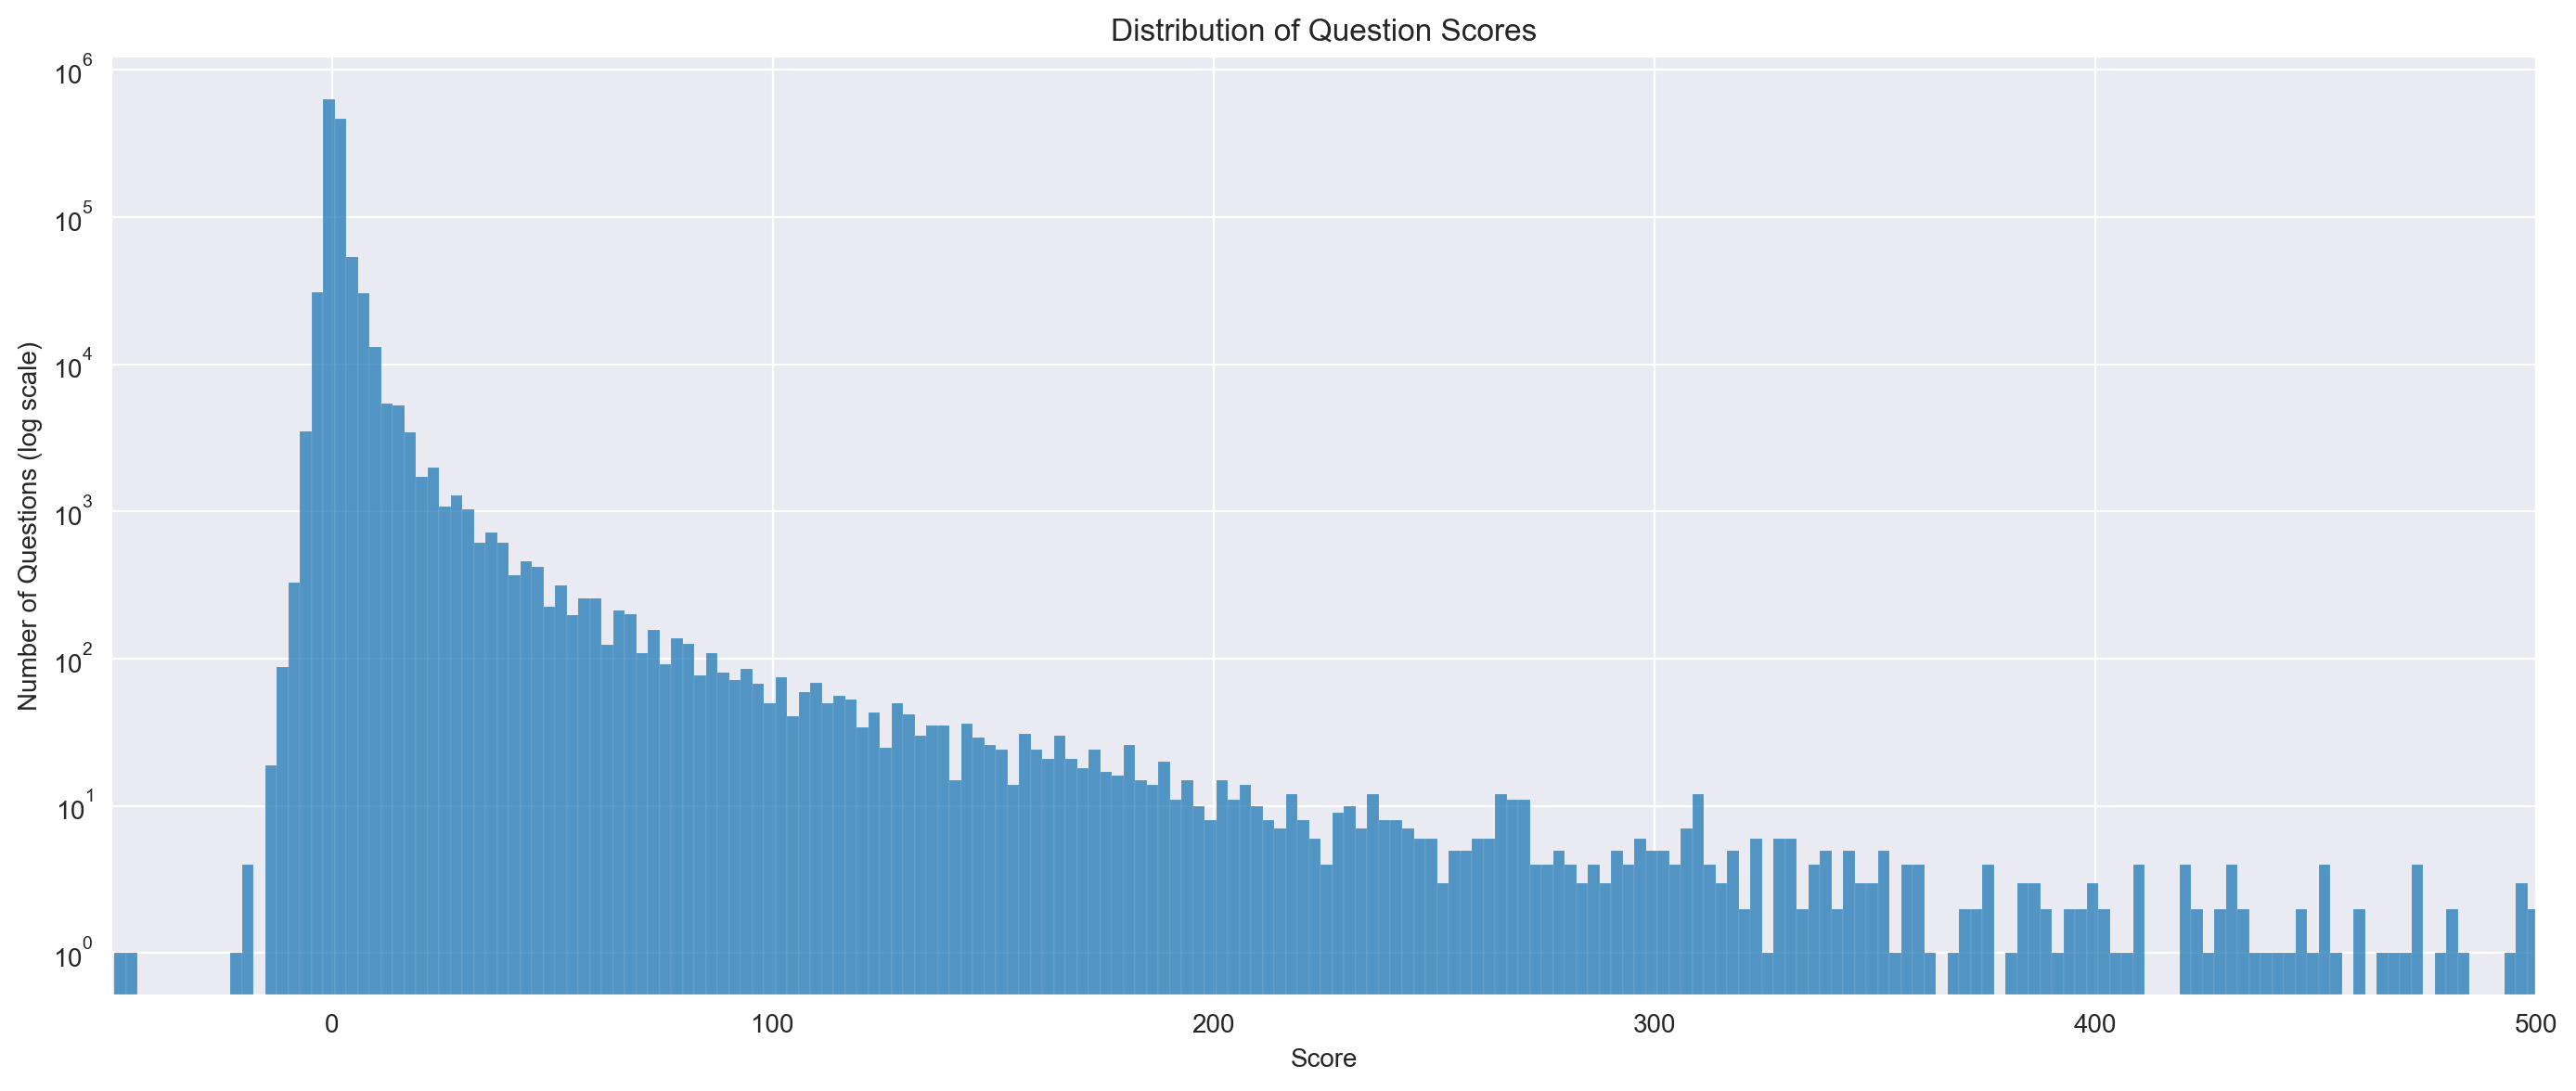

In [21]:
print(f"Number of rows in questions DataFrame: {len(questions)}")

plt.figure(figsize=(14, 6))
sns.histplot(questions['Score'], bins=2000, kde=False)
plt.yscale('log')
plt.title('Distribution of Question Scores')
plt.xlabel('Score')
plt.ylabel('Number of Questions (log scale)')
plt.xlim(-50, 500)  # Focus on the most relevant range
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
questions = questions[(questions['Score'] > 9) | (questions['Score'] < -20)]
# Print the number of rows after filtering
print(f"\nNumber of rows after removing questions within range: {len(questions)}")


Number of rows after removing questions within range: 36941


### Handle Tags


In [23]:
questions['Tags'].head()

0                          [flex, actionscript-3, air]
1    [svn, tortoisesvn, branch, branching-and-merging]
2                              [sql, asp.net, sitemap]
3    [algorithm, language-agnostic, colors, color-s...
4         [c#, .net, scripting, compiler-construction]
Name: Tags, dtype: object

Check distinct tags we have

In [24]:
explode_questions = questions.copy().explode('Tags')
tag_counts = explode_questions['Tags'].value_counts()
print(tag_counts)

Tags
java                     3492
c#                       3423
javascript               2837
android                  2720
python                   2273
                         ... 
splice                      1
igraph                      1
multi-gpu                   1
multiscreen                 1
member-initialization       1
Name: count, Length: 10435, dtype: int64


In [25]:
cum_coverage = tag_counts.cumsum() / tag_counts.sum()
top_tags = cum_coverage[cum_coverage <= 0.5].index.tolist()

# Aplicar el pruning
def prune_tags(tag_list, top_tags):
    pruned = [t for t in tag_list if t in top_tags]
    if len(pruned) == 0:
        return ['other']  # if there's no tags left -> 'other'
    else:
        return pruned

questions['tag_pruned'] = questions['Tags'].apply(lambda lst: prune_tags(lst, top_tags))

In [26]:
print(questions.columns)

Index(['Id', 'CreationDate', 'Score', 'Title', 'Body', 'AllAnswers',
       'NumAnswers', 'Tags', 'tag_pruned'],
      dtype='object')


Top 20 tags after pruning:
other         3628
java          3492
c#            3423
javascript    2837
android       2720
python        2273
c++           2181
.net          1451
jquery        1430
php           1413
dtype: int64

Questions with tag 'other': 3628 (9.82%)


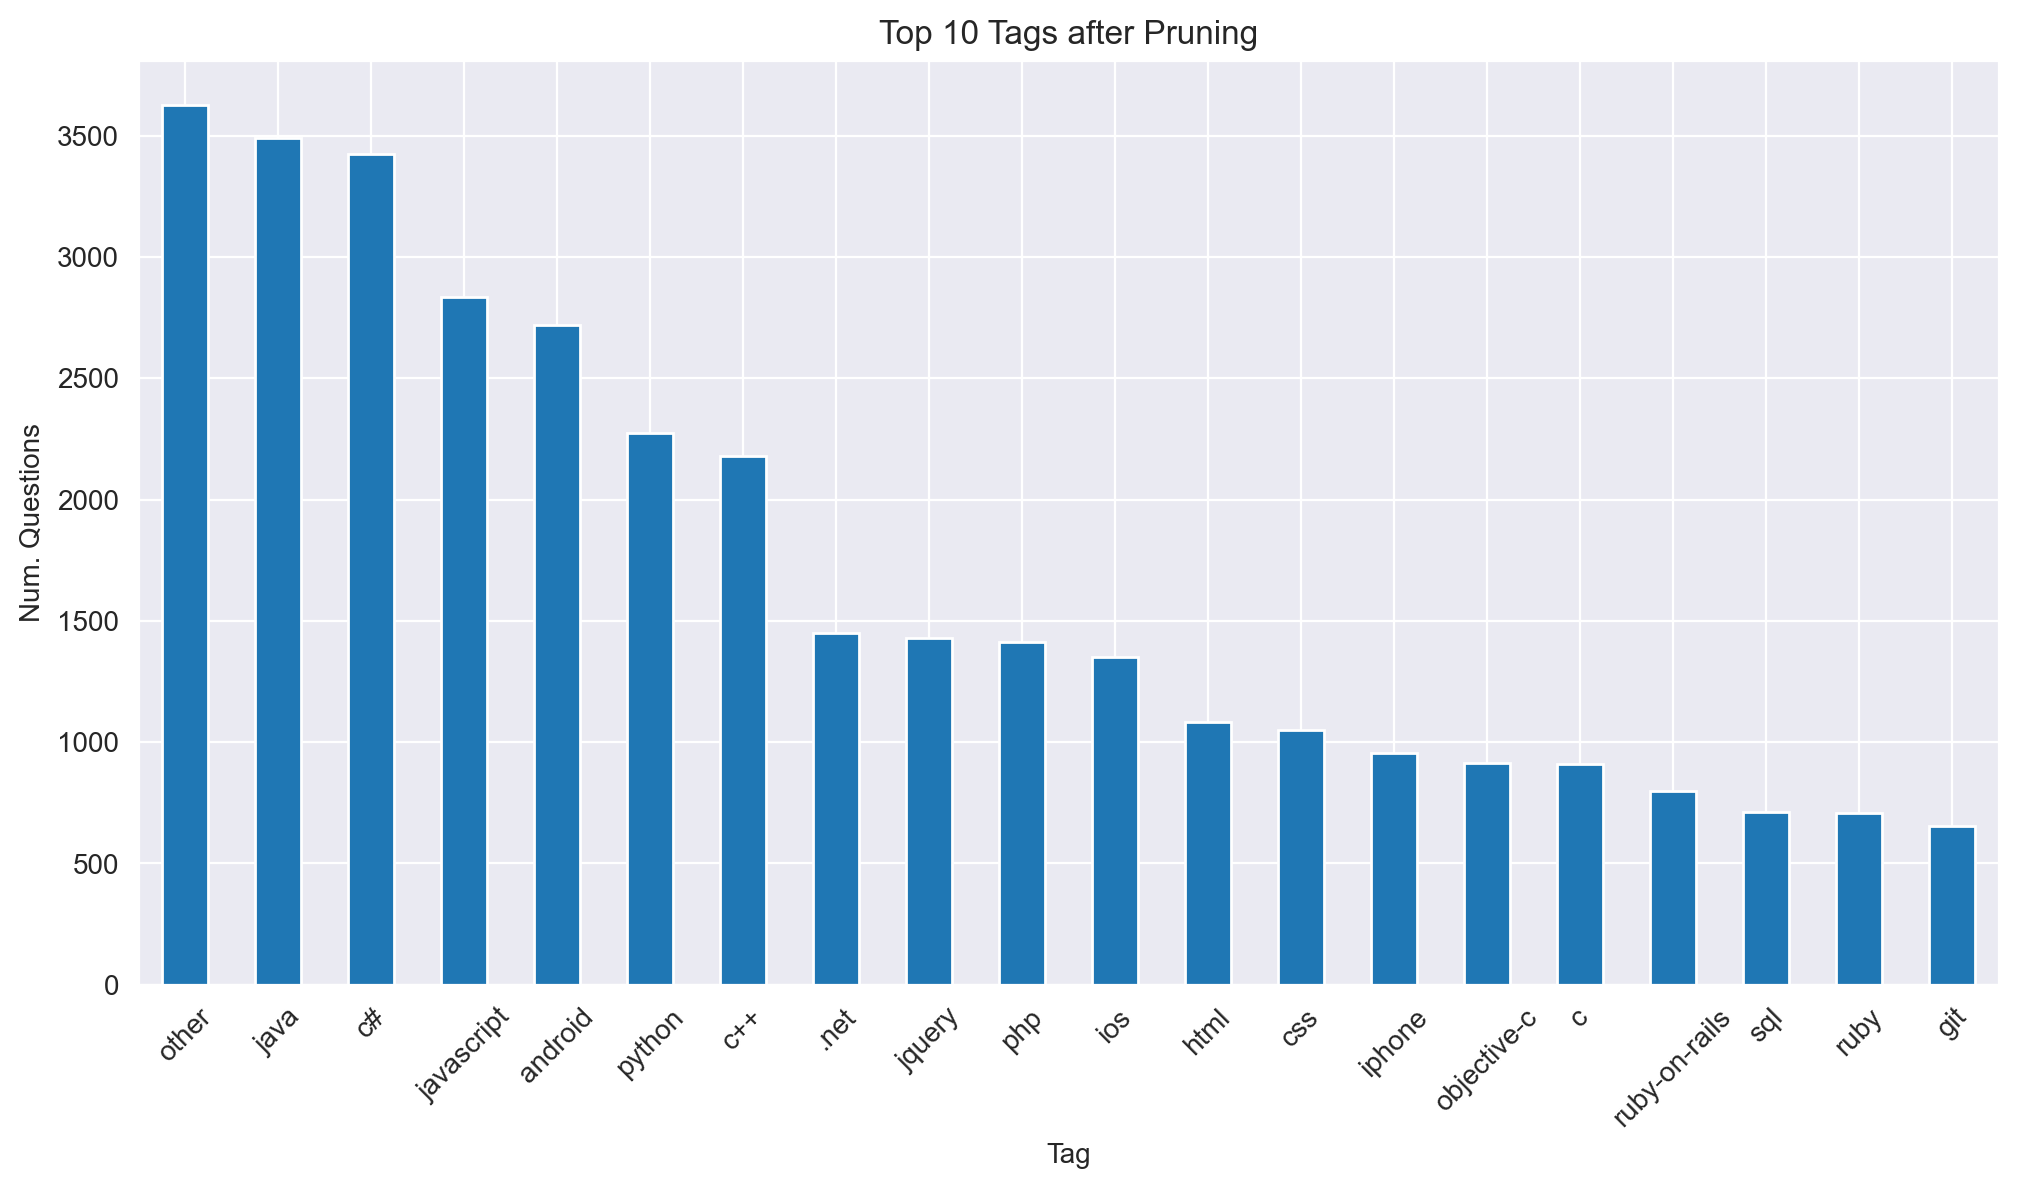

In [27]:
from collections import Counter

all_tags_pruned = [tag for tags in questions['tag_pruned'] for tag in tags]

# Count pruned tags
tag_pruned_counts = pd.Series(Counter(all_tags_pruned)).sort_values(ascending=False)
print("Top 20 tags after pruning:")
print(tag_pruned_counts.head(10))
# Count 'other' tags
num_other = (questions['tag_pruned'].apply(lambda tags: 'other' in tags)).sum()
print(f"\nQuestions with tag 'other': {num_other} ({num_other/len(questions):.2%})")

plt.figure(figsize=(12,6))
tag_pruned_counts.head(20).plot(kind='bar')
plt.title('Top 10 Tags after Pruning')
plt.xlabel('Tag')
plt.ylabel('Num. Questions')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Join title and question

In [28]:
questions['JoinedText'] = questions['Title'] + ' ' + questions['Body']

### Text Preprocessing

In [29]:
import spacy
from bs4 import BeautifulSoup
from tqdm import tqdm
tqdm.pandas()

# Load SpaCy English model
nlp = spacy.load("en_core_web_sm")



In [30]:
import re
!pip install contractions
import contractions
from termcolor import colored
import html

def wrangle_text(text):

    # Remove code blocks
    text = re.sub(r'<pre><code>.*?</code></pre>', '', text, flags=re.DOTALL)

    # Parse and strip HTML
    try:
        soup = BeautifulSoup(text, "lxml")
    except Exception:
        soup = BeautifulSoup(text, "html.parser")
    text = soup.get_text(separator=" ")

    # Expand contractions
    text = contractions.fix(text)
    # Unescape HTML entities
    text = html.unescape(text)
    # Remove URLs and malformed links (http, www, domain-looking patterns)
    text = re.sub(r'\b(?:http|www)[^\s]+', '', text)
    text = re.sub(r'\b\S+\.com\S*', '', text)
    text = re.sub(r'\b\S+\.org\S*', '', text)
    text = re.sub(r'\b\S+\.net\S*', '', text)
    # Remove emojis, special unicode
    text = re.sub(r'[\U00010000-\U0010ffff]', '', text)
    # Remove any non-letter characters (punctuation, digits, etc.)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Lowercase
    text = text.lower()
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text


def wrangle_answers(text):
    # Separated by ||| for keep differentiation between answers
    parts = text.split('|||')
    cleaned_parts = [wrangle_text(part) for part in parts]
    return ' ||| '.join(cleaned_parts)



[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
questions['joinedtext_clean'] = questions['JoinedText'].apply(wrangle_text)

#For Clustering
questions['answers_clean'] = questions['AllAnswers'].apply(wrangle_answers)


C:\Users\HP\AppData\Local\Temp\ipykernel_10288\301529763.py:16: XMLParsedAsHTMLWarning: It looks like you're using an HTML parser to parse an XML document.

Assuming this really is an XML document, what you're doing might work, but you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the Python package 'lxml' installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.

If you want or need to use an HTML parser on this document, you can make this warning go away by filtering it. To do that, run this code before calling the BeautifulSoup constructor:

    from bs4 import XMLParsedAsHTMLWarning
    import warnings

    warnings.filterwarnings("ignore", category=XMLParsedAsHTMLWarning)

  soup = BeautifulSoup(text, "html.parser")


In [32]:
#For clustering
questions["fulltext_clean"] = questions["joinedtext_clean"] + " " + questions["answers_clean"]

In [33]:
print(colored('\n============= Raw description =============', 'blue'))

first_description = questions.loc[50, 'JoinedText']
print(first_description, '\n')

print(colored('\n============= After wrangling result =============', 'blue'))

wrangled_description =  questions.loc[50, 'joinedtext_clean']
print(wrangled_description)



============= Raw description =============
How to easily consume a web service from PHP <p>Is there available any tool for PHP which can be used to generate code for consuming a <a href="http://en.wikipedia.org/wiki/Web_service">web service</a> based on its <a href="http://en.wikipedia.org/wiki/Web_Services_Description_Language">WSDL</a>? Something comparable to clicking "Add Web Reference" in Visual Studio or the Eclipse plugin which does the same thing for Java.</p>
 


============= After wrangling result =============
how to easily consume a web service from php is there available any tool for php which can be used to generate code for consuming a web service based on its wsdl something comparable to clicking add web reference in visual studio or the eclipse plugin which does the same thing for java


In [34]:
print(questions.columns)
print(type(questions["joinedtext_clean"][0]))

Index(['Id', 'CreationDate', 'Score', 'Title', 'Body', 'AllAnswers',
       'NumAnswers', 'Tags', 'tag_pruned', 'JoinedText', 'joinedtext_clean',
       'answers_clean', 'fulltext_clean'],
      dtype='object')
<class 'str'>


Spcifically in the context of classification, we would have a problem since, if the tag appears in the questions or the answers, the classifier will directly assign this tag leading to a complete overfitting case. 

In [35]:
# Function to check if any tag is present in the text
def tag_in_text(row):
    text = row['JoinedText'].lower()  # Lowercase the text for case-insensitive matching
    for tag in row['tag_pruned']:
        tag_lower = tag.lower()
        # Check if the tag is directly in the text
        if tag_lower in text:
            return True
    return False

# Apply the filtering to remove rows that contain tags in the 'JoinedText' field
questions_filtered = questions[~questions.apply(tag_in_text, axis=1)]

# Print the results
print(f"Original size: {len(questions)}")
print(f"Filtered size: {len(questions_filtered)}")
print(f"Removed: {len(questions) - len(questions_filtered)} rows")

Original size: 36941
Filtered size: 11278
Removed: 25663 rows


## TASK 1. NLP

### Spacy Pipeline

In [36]:
import spacy
!python -m spacy download en_core_web_md

     ---------------------------------------- 0.0/33.5 MB ? eta -:--:--
     - -------------------------------------- 1.6/33.5 MB 12.0 MB/s eta 0:00:03
     ---- ----------------------------------- 3.7/33.5 MB 10.4 MB/s eta 0:00:03
     ------- -------------------------------- 6.0/33.5 MB 10.9 MB/s eta 0:00:03
     ---------- ----------------------------- 9.2/33.5 MB 11.9 MB/s eta 0:00:03
     -------------- ------------------------ 12.1/33.5 MB 12.4 MB/s eta 0:00:02
     ----------------- --------------------- 15.2/33.5 MB 12.7 MB/s eta 0:00:02
     -------------------- ------------------ 17.6/33.5 MB 12.9 MB/s eta 0:00:02
     ----------------------- --------------- 20.4/33.5 MB 12.7 MB/s eta 0:00:02
     -------------------------- ------------ 23.1/33.5 MB 12.8 MB/s eta 0:00:01
     ----------------------------- --------- 25.4/33.5 MB 12.7 MB/s eta 0:00:01
     -------------------------------- ------ 28.0/33.5 MB 12.6 MB/s eta 0:00:01
     ----------------------------------- --- 30.


[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
spacy.prefer_gpu()
nlp = spacy.load('en_core_web_md')

In [38]:
def normalize(doc):
    return [token.lemma_ for token in doc if token.has_vector and token.is_alpha and not token.is_punct and not token.is_stop and not token.ent_type_]

In [39]:
from spacy.language import Language

@Language.component("normalize_doc_component")
def create_normalize_doc_component(doc):
   return normalize(doc)

nlp.add_pipe("normalize_doc_component", after="ner")
nlp.pipe_names

['tok2vec',
 'tagger',
 'parser',
 'attribute_ruler',
 'lemmatizer',
 'ner',
 'normalize_doc_component']

In [40]:
# Process and replace fulltext_clean
docs_fulltext = list(nlp.pipe(questions_filtered['joinedtext_clean'],batch_size=50))

In [41]:
questions_filtered.head()

Id          CreationDate  Score  \
0     80  2008-08-01T13:57:07Z     26   
3    180  2008-08-01T18:42:19Z     53   
7    580  2008-08-02T23:30:59Z     21   
8    650  2008-08-03T11:12:52Z     79   
11  1010  2008-08-04T03:59:42Z     14   

                                                Title  \
0   SQLStatement.execute() - multiple queries in o...   
3                  Function for creating color wheels   
7    Deploying SQL Server Databases from Test to Live   
8                 Automatically update version number   
11  How to get the value of built, encoded ViewState?   

                                                 Body  \
0   <p>I've written a database generation script i...   
3   <p>This is something I've pseudo-solved many t...   
7   <p>I wonder how you guys manage deployment of ...   
8   <p>I would like the version property of my app...   
11  <p>I need to grab the base64-encoded represent...   

                                           AllAnswers  NumAnswers  \
0   <p>I wound up using this. It is a kind of a ha...           3   
3   <p>I've read somewhere the human eye can't dis...           9   
7   <p>For my projects I alternate between SQL Com...          14   
8   <p>With the "Built in" stuff, you can't, as us...           6   
11  <p>Rex, I suspect a good place to start lookin...           3   

                                                 Tags  \
0                         [flex, actionscript-3, air]   
3   [algorithm, language-agnostic, colors, color-s...   
7   [sql-server, sql-server-2005, deployment, rele...   
8                     [c#, visual-studio, versioning]   
11                                      [c#, asp.net]   

                        tag_pruned  \
0                          [other]   
3   [algorithm, language-agnostic]   
7                     [sql-server]   
8              [c#, visual-studio]   
11                   [c#, asp.net]   

                                           JoinedText  \
0   SQLStatement.execute() - multiple queries in o...   
3   Function for creating color wheels <p>This is ...   
7   Deploying SQL Server Databases from Test to Li...   
8   Automatically update version number <p>I would...   
11  How to get the value of built, encoded ViewSta...   

                                     joinedtext_clean  \
0   sqlstatementexecute multiple queries in one st...   
3   function for creating color wheels this is som...   
7   deploying sql server databases from test to li...   
8   automatically update version number i would li...   
11  how to get the value of built encoded viewstat...   

                                        answers_clean  \
0   i wound up using this it is a kind of a hack b...   
3   i have read somewhere the human eye cannot dis...   
7   for my projects i alternate between sql compar...   
8   with the built in stuff you cannot as using or...   
11  rex i suspect a good place to start looking is...   

                                       fulltext_clean  
0   sqlstatementexecute multiple queries in one st...  
3   function for creating color wheels this is som...  
7   deploying sql server databases from test to li...  
8   automatically update version number i would li...  
11  how to get the value of built encoded viewstat...

Results of the tokenized text

In [42]:
print('The first original question is:', questions_filtered.loc[0, ['JoinedText']])
print('-----------------------------------------')
print('The first normalized question is:', questions_filtered.loc[0, ['joinedtext_clean']])


The first original question is: JoinedText    SQLStatement.execute() - multiple queries in o...
Name: 0, dtype: object
-----------------------------------------
The first normalized question is: joinedtext_clean    sqlstatementexecute multiple queries in one st...
Name: 0, dtype: object


### Text Vectorization

In [43]:
from gensim.models import Word2Vec
from gensim.corpora import Dictionary

In [44]:
D = Dictionary(docs_fulltext)
D.doc2bow(docs_fulltext[6])

[(18, 4),
 (32, 1),
 (89, 1),
 (90, 8),
 (124, 1),
 (152, 1),
 (175, 1),
 (187, 1),
 (188, 1),
 (189, 1),
 (190, 1),
 (191, 1),
 (192, 1),
 (193, 2),
 (194, 1),
 (195, 1),
 (196, 1),
 (197, 1),
 (198, 1),
 (199, 1),
 (200, 1),
 (201, 1),
 (202, 1),
 (203, 1),
 (204, 1),
 (205, 1),
 (206, 1),
 (207, 2)]

In [45]:
len(D)

11508

In [46]:
words = pd.DataFrame(columns=["token", "ndocs"])
for row in [D.doc2bow(doc) for doc in docs_fulltext]:
  for word_id, count in row:
    token = D[word_id]
    if token not in words.index:
      words.loc[token] = [token, 0]
    words.loc[token, "ndocs"] += count

words = words.sort_values(by="ndocs", ascending=False)

In [47]:
words

token  ndocs
like              like   4727
use                use   4367
work              work   4096
code              code   3874
try                try   3688
...                ...    ...
mephisto      mephisto      1
preamble      preamble      1
vimperator  vimperator      1
mouseless    mouseless      1
relabel        relabel      1

[11508 rows x 2 columns]

 Remove very rare and too common words, to make the representation more efficient

In [48]:
lower_limit = 2
upper_limit = .80

D.filter_extremes(no_below=lower_limit,no_above=upper_limit)
n_tokens = len(D)

print('The dictionary contains', n_tokens, 'terms')

The dictionary contains 6824 terms


### TF-IDF

In [49]:
from gensim.models import TfidfModel

bow = [D.doc2bow(doc) for doc in docs_fulltext]
tfidf = TfidfModel(bow)

Convert text representations into sparse matrices

In [50]:
from gensim.matutils import corpus2csc

n_tokens = len(D)
num_docs = len(bow)
corpus_bow_sparse = corpus2csc(bow, num_terms=n_tokens, num_docs=num_docs).T
corpus_tfidf_sparse = corpus2csc(tfidf[bow], num_terms=n_tokens, num_docs=num_docs).T

In [51]:
print("TF-IDF matrix shape:", corpus_tfidf_sparse.shape)
# (num_docs, num_terms)

TF-IDF matrix shape: (11278, 6824)


In [52]:
sample_doc_id = 0
sample_tfidf = tfidf[bow[sample_doc_id]]

top_words = sorted(sample_tfidf, key=lambda x: x[1], reverse=True)[:10]
print("\nTop TF-IDF words for document 0:")
for word_id, score in top_words:
    print(f"{D[word_id]}: {round(score, 4)}")


Top TF-IDF words for document 0:
air: 0.494
adobe: 0.4639
query: 0.4362
statement: 0.2477
execute: 0.232
semicolon: 0.219
multiple: 0.2039
generation: 0.1767
script: 0.1161
sql: 0.1154


### Word2Vec

In [53]:
from gensim.models import KeyedVectors

word2vec = Word2Vec(sentences=docs_fulltext, vector_size=200, window=5, min_count=2, workers=4)

word_vectors = word2vec.wv

word_vectors.save("model_w2v.wordvectors")
wv = KeyedVectors.load("model_w2v.wordvectors", mmap='r')


In [54]:
print(colored('\n============= Word2Vec vocabulary =============', 'blue'))
words = list(wv.key_to_index)
print(words[0:50])
print(colored('\n============= Embedding of the first word =============', 'blue'))
print(wv[words[0]])


============= Word2Vec vocabulary =============
['like', 'use', 'work', 'code', 'try', 'file', 'way', 'want', 'error', 'need', 'find', 'method', 'create', 'know', 'run', 'set', 'add', 'user', 'class', 'value', 'example', 'change', 'follow', 'view', 'object', 'problem', 'test', 'look', 'time', 'new', 'type', 'application', 'question', 'function', 'server', 'app', 'thank', 'get', 'datum', 'page', 'project', 'return', 'possible', 'update', 'line', 'good', 'list', 'write', 'call', 'version']

============= Embedding of the first word =============
[ 3.87522161e-01  2.61300076e-02 -2.68071853e-02 -4.26140800e-02
 -5.57949282e-02  7.47362301e-02  2.54938334e-01  8.53498340e-01
 -2.00179279e-01  3.40498328e-01 -1.24274738e-01 -4.61663514e-01
  1.15758985e-01 -3.97585481e-01 -1.03008263e-02 -1.03591792e-01
  3.00906330e-01  2.72435933e-01 -1.09465182e-01 -9.75364864e-01
  1.22542329e-01  1.58129893e-02  1.69739649e-01  2.74911761e-01
 -3.86168389e-03  6.04399422e-04  4.05441791e-01 -1.5420152

In [55]:
from gensim import downloader
glove = downloader.load('glove-wiki-gigaword-100')

In [63]:
def tokens_to_glove_vector(tokens, glove, dim=100):
    vectors = [glove[word] for word in tokens if word in glove]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(dim)
X_glove = np.array([
    tokens_to_glove_vector(tokens, glove, dim=100) 
    for tokens in questions_filtered['joinedtext_clean']
])

In [ ]:
print(f"The dictionary size is {glove.vectors.shape[0]}.\n\
        Each embedding has a dimension of {glove.vectors.shape[1]}")
print(colored('\n============= Most similar words to ai =============', 'green'))
print(glove.most_similar('follow'))
print(colored('\n============= Most similar words to world =============', 'green'))
print(glove.most_similar('world'))

The dictionary size is 400000.
        Each embedding has a dimension of 100

============= Most similar words to ai =============
[('take', 0.7860994338989258), ('come', 0.7848895192146301), ('continue', 0.7645741105079651), ('change', 0.7518483400344849), ('go', 0.7475985288619995), ('make', 0.7473008036613464), ('turn', 0.746422290802002), ('must', 0.7427165508270264), ('way', 0.738013505935669), ('see', 0.7372366786003113)]

============= Most similar words to world =============
[('europe', 0.7643163800239563), ('america', 0.7542148232460022), ('event', 0.7453857660293579), ('country', 0.7444548010826111), ('ever', 0.7283254265785217), ('time', 0.7190432548522949), ('european', 0.7171249985694885), ('nation', 0.7154896855354309), ('competition', 0.7093958854675293), ('olympic', 0.7056541442871094)]


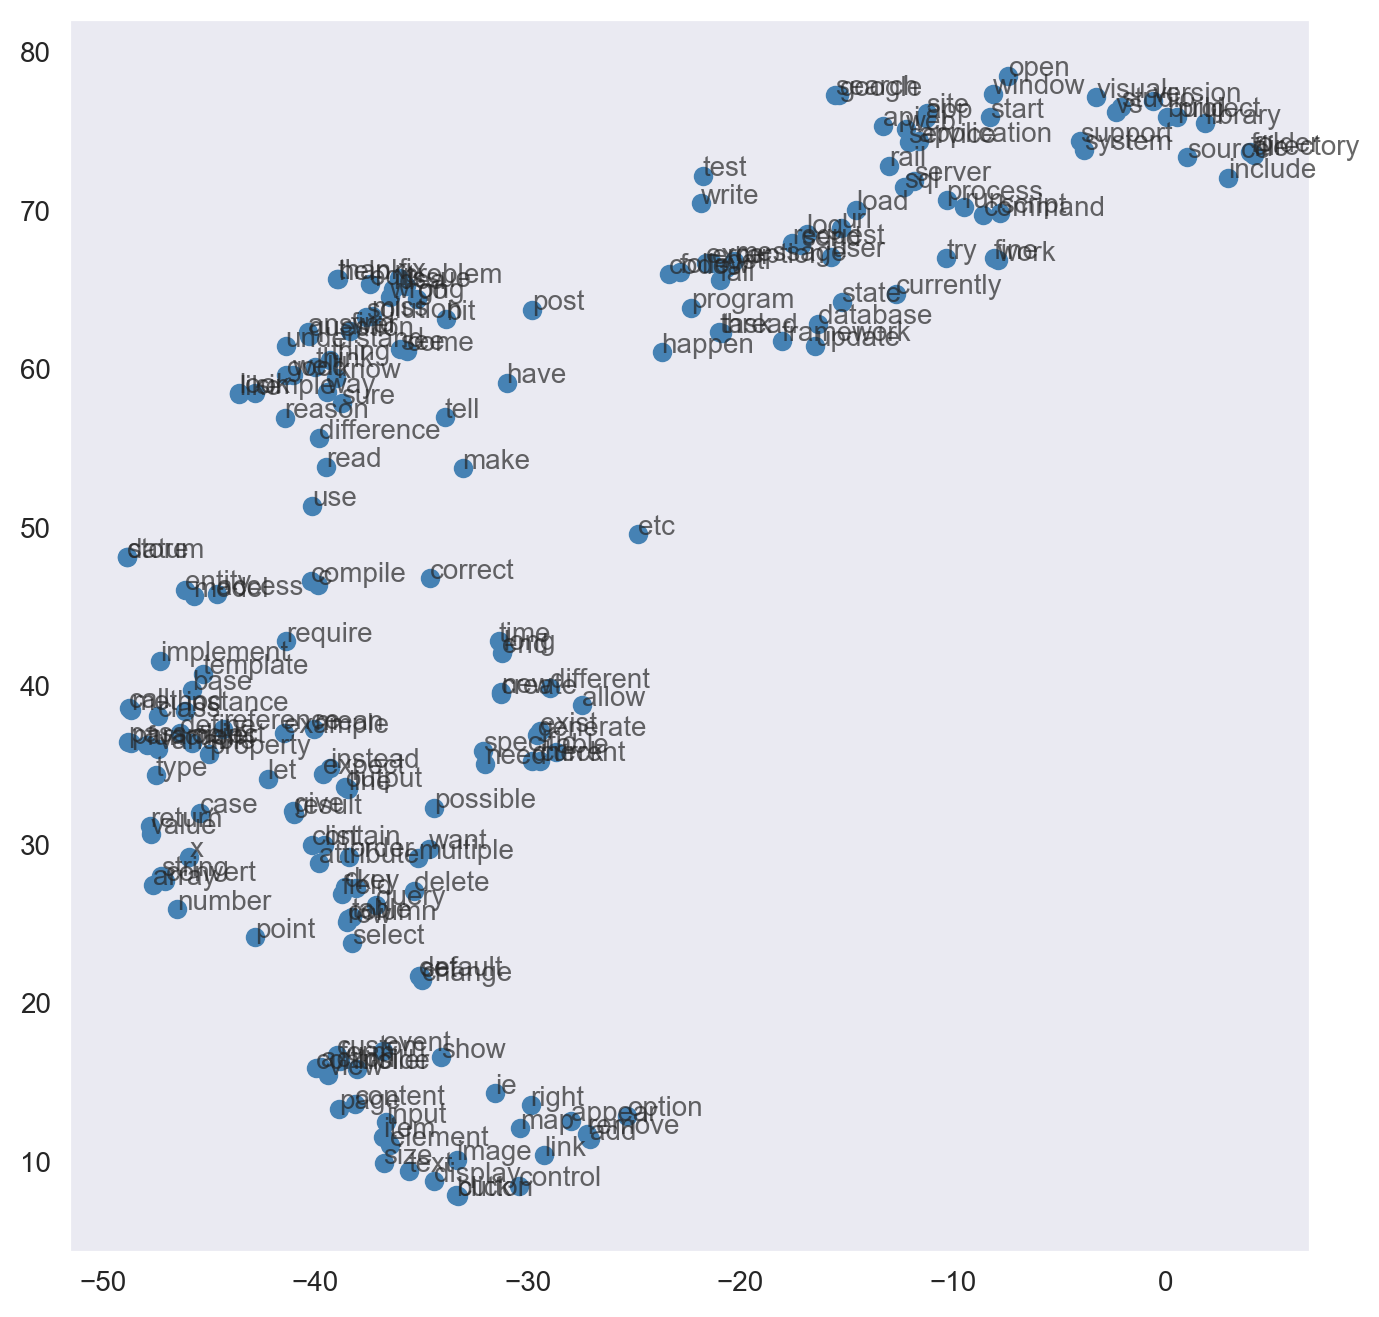

In [56]:
from sklearn.manifold import TSNE

tsne = TSNE(init='random')
embed_tsne = tsne.fit_transform(wv.vectors)

fig, ax = plt.subplots(figsize=(8, 8))
for idx, word in enumerate((list(wv.key_to_index.keys())[:200])):
    plt.scatter(*embed_tsne[idx, :], color='steelblue')
    plt.annotate(word, (embed_tsne[idx, 0], embed_tsne[idx, 1]), alpha=0.7)

plt.grid()

### Latent Dirichlet Allocation

In [57]:
from gensim.models.ldamodel import LdaModel
num_topics = 10
ldag = LdaModel(corpus=bow, id2word=D, num_topics=num_topics)

In [58]:
ldag.show_topics(num_topics=-1, num_words=10, log=False, formatted=True)

[(0,
  '0.022*"server" + 0.018*"table" + 0.013*"column" + 0.013*"code" + 0.012*"object" + 0.012*"error" + 0.011*"database" + 0.010*"try" + 0.009*"sql" + 0.009*"query"'),
 (1,
  '0.023*"class" + 0.022*"test" + 0.020*"method" + 0.013*"like" + 0.013*"image" + 0.013*"use" + 0.012*"function" + 0.011*"code" + 0.010*"way" + 0.010*"array"'),
 (2,
  '0.014*"time" + 0.013*"function" + 0.013*"command" + 0.012*"file" + 0.012*"x" + 0.012*"output" + 0.012*"version" + 0.012*"work" + 0.011*"difference" + 0.010*"read"'),
 (3,
  '0.016*"node" + 0.013*"code" + 0.012*"change" + 0.011*"work" + 0.011*"way" + 0.010*"child" + 0.009*"like" + 0.009*"div" + 0.008*"question" + 0.007*"parent"'),
 (4,
  '0.019*"error" + 0.017*"run" + 0.016*"load" + 0.015*"use" + 0.014*"file" + 0.012*"try" + 0.010*"instal" + 0.009*"build" + 0.009*"version" + 0.009*"page"'),
 (5,
  '0.029*"app" + 0.012*"work" + 0.012*"application" + 0.011*"run" + 0.011*"try" + 0.010*"window" + 0.009*"like" + 0.009*"user" + 0.008*"service" + 0.008*"op

In [59]:
# Get topic distributions for all documents
lda_vectors = []
for bow_doc in bow:
    topic_dist = ldag.get_document_topics(bow_doc, minimum_probability=0)
    lda_vectors.append([prob for _, prob in topic_dist])

lda_vectors = np.array(lda_vectors)
print("LDA topic matrix shape:", lda_vectors.shape)

LDA topic matrix shape: (11278, 10)


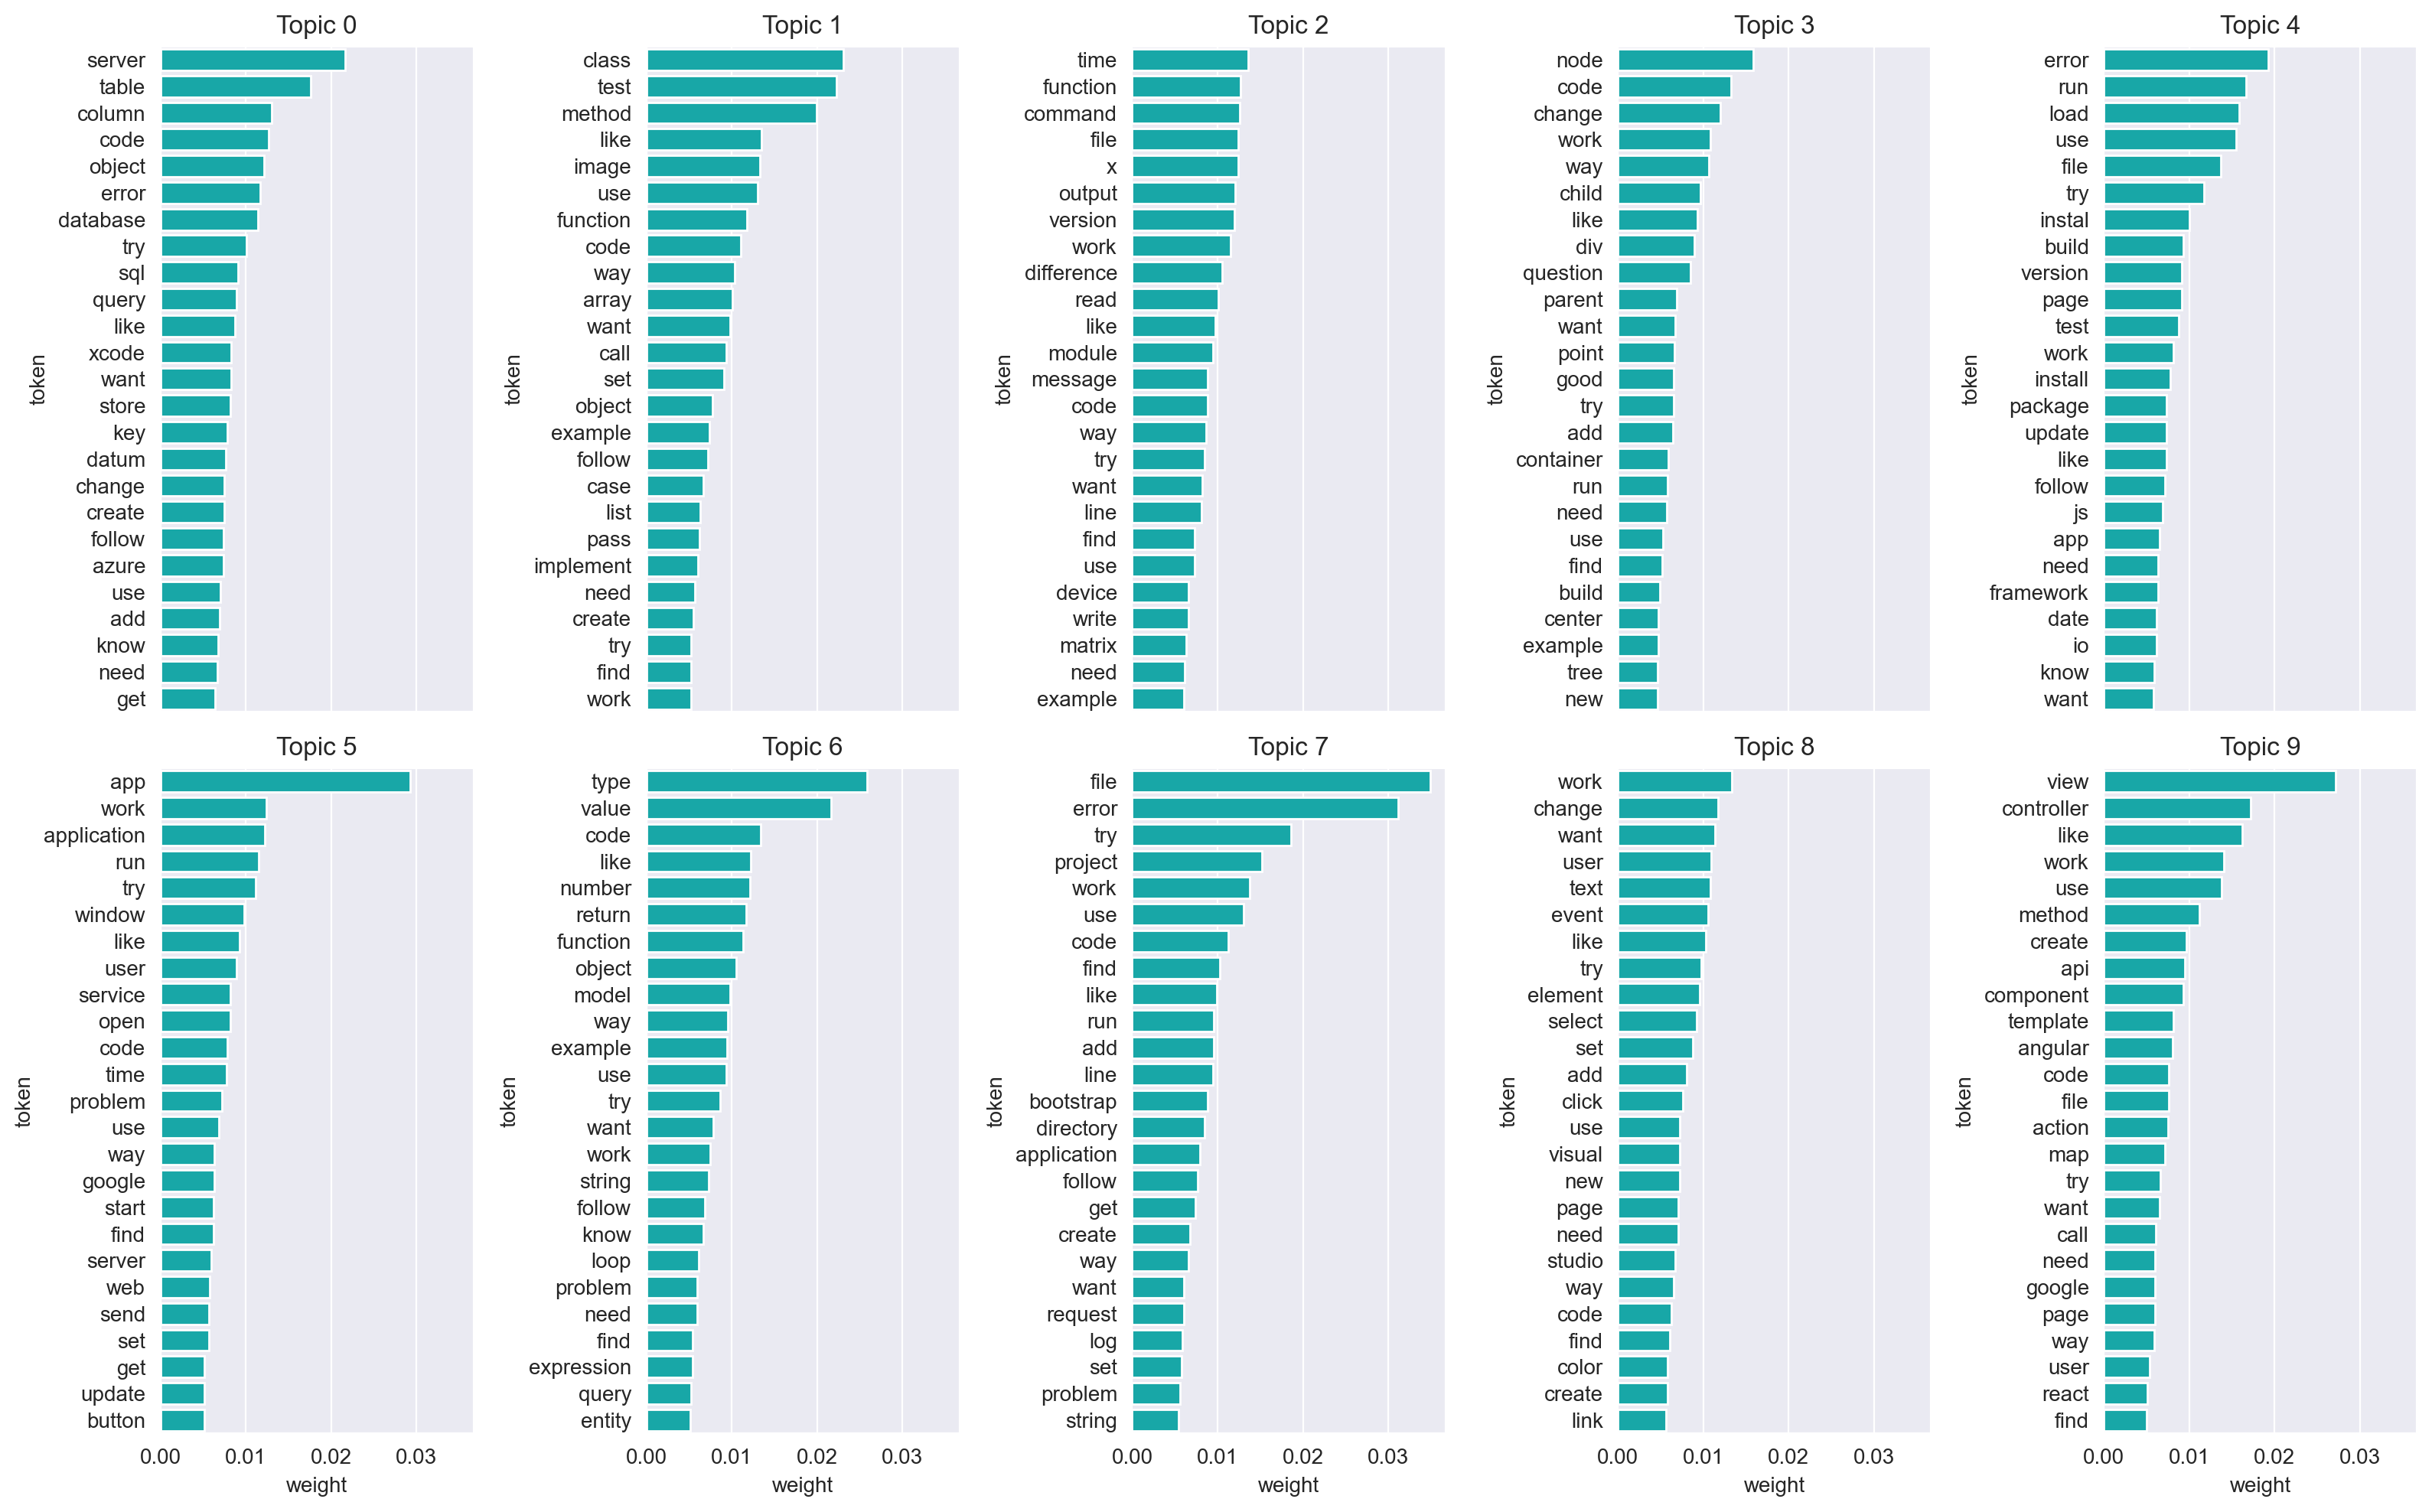

In [60]:
topn = 25
num_rows = 2
num_cols = 5

fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 10), sharex=True)

for i in range(num_rows * num_cols):
    data = ldag.show_topic(i, topn=topn)
    df = pd.DataFrame(data, columns=['token', 'weight'])
    row_index = i // num_cols
    col_index = i % num_cols
    sns.barplot(x='weight', y='token', data=df, color='c', orient='h', ax=axes[row_index][col_index])
    axes[row_index][col_index].set_title('Topic ' + str(i))

plt.tight_layout()
plt.show()

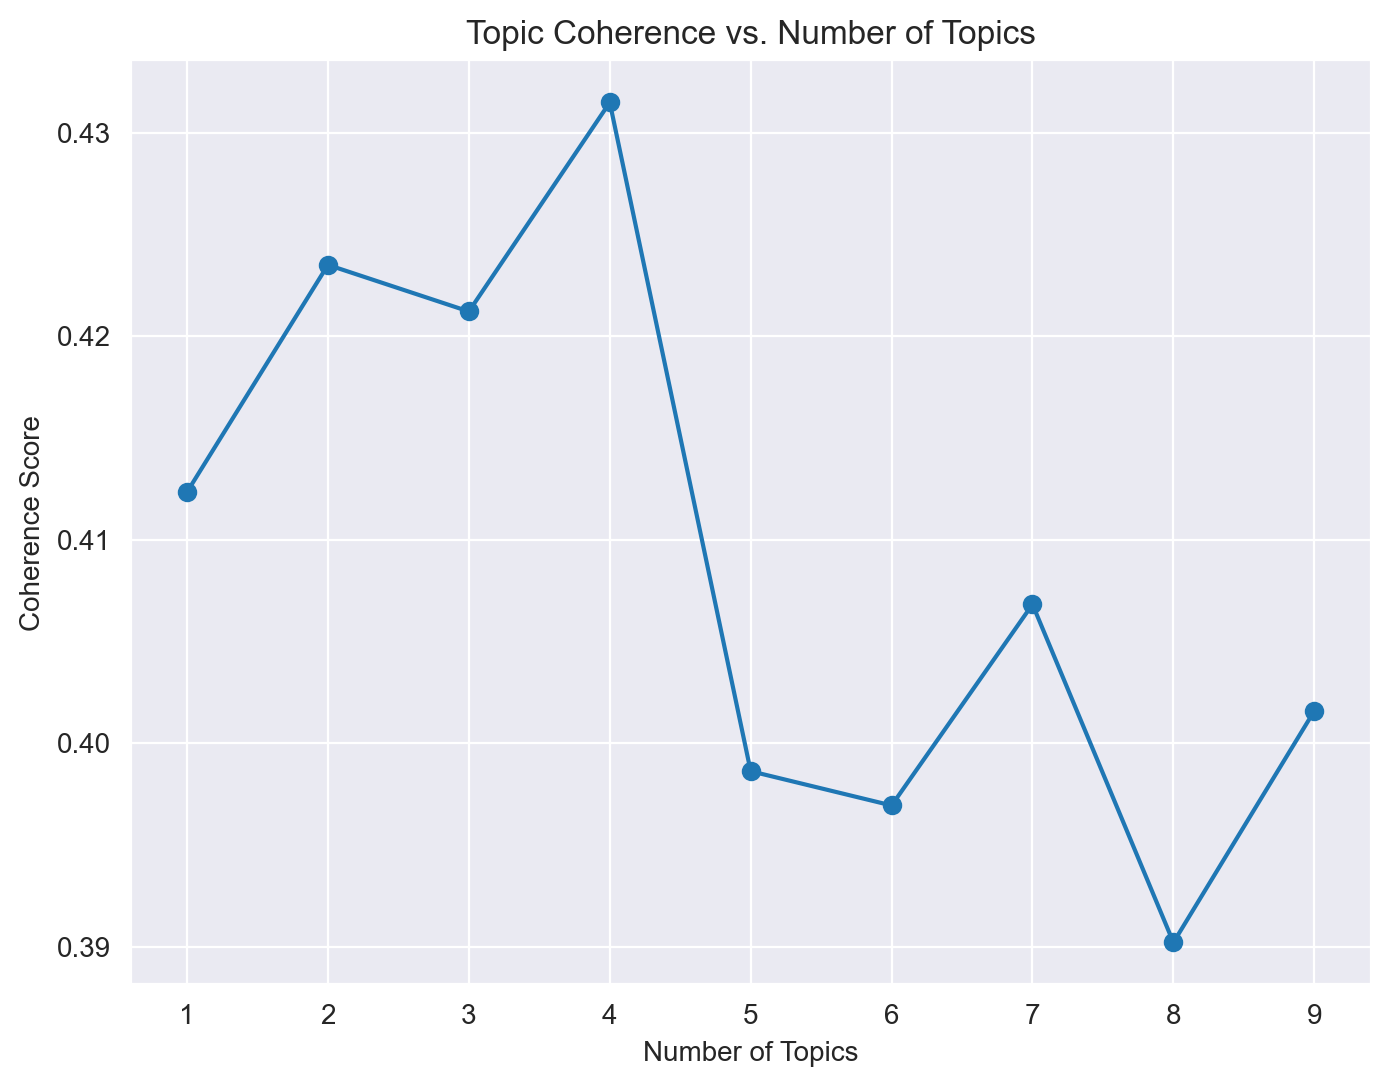

In [61]:
from gensim.models.coherencemodel import CoherenceModel

n_topics_range = list(range(1, 10, 1))
coherence_scores = []
for n_topics in n_topics_range:
    ldag = LdaModel(corpus=bow, id2word=D, num_topics=n_topics)
    coherencemodel = CoherenceModel(model=ldag, texts=docs_fulltext, dictionary=D, coherence='c_v')
    coherence_score = coherencemodel.get_coherence()
    coherence_scores.append(coherence_score)

plt.plot(n_topics_range, coherence_scores, marker='o')
plt.title('Topic Coherence vs. Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.xticks(n_topics_range)
plt.grid(True)
plt.show()

In [62]:
coherencemodel = CoherenceModel(ldag, texts=docs_fulltext, dictionary=D, coherence='c_v')
print('The coherence of the trained model is', coherencemodel.get_coherence())

The coherence of the trained model is 0.4015858754503304


## TASK 2. Machine Learning
## 2.1. Classification

In [64]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
encoded_categories = mlb.fit_transform(questions_filtered['tag_pruned'])
mlb.classes_

array(['.net', 'ajax', 'algorithm', 'android', 'android-layout',
       'android-studio', 'angularjs', 'apache', 'api', 'arrays',
       'asp.net', 'asp.net-mvc', 'asp.net-mvc-3', 'bash', 'browser', 'c#',
       'c++', 'c++11', 'caching', 'class', 'clojure', 'cocoa',
       'cocoa-touch', 'collections', 'compiler-construction', 'css',
       'css3', 'database', 'date', 'datetime', 'debugging', 'delphi',
       'design-patterns', 'django', 'dom', 'eclipse', 'emacs',
       'entity-framework', 'enums', 'events', 'exception',
       'exception-handling', 'facebook', 'file', 'forms', 'function',
       'functional-programming', 'gcc', 'generics', 'git', 'github', 'go',
       'google-chrome', 'google-maps', 'haskell', 'hibernate', 'html',
       'html5', 'http', 'image', 'inheritance', 'intellij-idea',
       'internet-explorer', 'ios', 'ipad', 'iphone', 'java', 'javascript',
       'jquery', 'jquery-ui', 'json', 'lambda', 'language-agnostic',
       'laravel', 'linq', 'linux', 'list', 'lo

In [65]:
def warn(*args, **kwargs): # Omit warnings
    pass
import warnings
warnings.warn = warn

### BoW Model

#### Multilabel Classification

In [66]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(corpus_bow_sparse, encoded_categories, test_size=0.2, random_state=42)
# Declare the oversampler we will use
oversampler = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=5)

Let's try a multilabel classification

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Random Forest without parameter tuning
classifier1 = RandomForestClassifier()
classifier1.fit(X_train,y_train)

# Classifying all classes at once
y_pred1 = classifier1.predict(X_test)

print(classification_report(y_test,y_pred1))
print("Accuracy score:", accuracy_score(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        86
           1       0.00      0.00      0.00         2
           2       1.00      0.05      0.10        19
           3       1.00      0.14      0.25        90
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         1
           6       1.00      0.09      0.16        34
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1
           9       1.00      0.06      0.11        17
          10       0.00      0.00      0.00        36
          11       0.64      0.13      0.22        52
          12       0.00      0.00      0.00        19
          13       0.00      0.00      0.00         5
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00       268
          16       1.00      0.05      0.10       120
          17       0.00    

In [68]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier

# SVC without parameter tuning
svc = svm.SVC(C=1.0, kernel='linear')
clf = OneVsRestClassifier(svc)

# Classifying all classes at once
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test,y_pred))
accuracy = clf.score(X_test, y_test)
print(accuracy)

              precision    recall  f1-score   support

           0       0.12      0.16      0.14        86
           1       0.00      0.00      0.00         2
           2       0.21      0.21      0.21        19
           3       0.53      0.60      0.56        90
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         1
           6       0.43      0.47      0.45        34
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1
           9       0.33      0.29      0.31        17
          10       0.13      0.19      0.16        36
          11       0.29      0.46      0.36        52
          12       0.19      0.37      0.25        19
          13       0.00      0.00      0.00         5
          14       0.00      0.00      0.00         0
          15       0.32      0.34      0.33       268
          16       0.40      0.43      0.42       120
          17       0.19    

Both, random forest classifier and SVC classifier perform poorly on predicting tags, this is because, some tags are presented in only a few samples. We are going to take a look at another classifier, one that predicts if a tag is presented in a question.

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {'penalty': ['l2'], 'C': [0.4]}

scores1 = []
for i in range(y_train.shape[1]):
    # Cross-validation
    grid_clf = GridSearchCV(LogisticRegression(), param_grid=param_grid, cv=5)
    grid_clf.fit(X_train, y_train[:,i])
    y_pred = grid_clf.predict(X_test)
    print(f'Accuracy for {mlb.classes_[i]}: {grid_clf.score(X_test, y_test[:,i])}')
    scores1.append(grid_clf.score(X_test, y_test[:,i]))

print('------------------------------------------------------------------')
print(f'Mean accuracy for Logistic Regression: {sum(scores1)/len(scores1)}')

Accuracy for .net: 0.9539007092198581
Accuracy for ajax: 0.999113475177305
Accuracy for algorithm: 0.9924645390070922
Accuracy for android: 0.976063829787234
Accuracy for android-layout: 0.9973404255319149
Accuracy for android-studio: 0.9986702127659575
Accuracy for angularjs: 0.988031914893617
Accuracy for apache: 0.999113475177305
Accuracy for api: 0.9995567375886525
Accuracy for arrays: 0.9942375886524822
Accuracy for asp.net: 0.9835992907801419
Accuracy for asp.net-mvc: 0.9809397163120568
Accuracy for asp.net-mvc-3: 0.9933510638297872
Accuracy for bash: 0.9973404255319149
Accuracy for browser: 1.0
Accuracy for c#: 0.8776595744680851
Accuracy for c++: 0.9516843971631206
Accuracy for c++11: 0.9920212765957447
Accuracy for caching: 0.99822695035461
Accuracy for class: 1.0
Accuracy for clojure: 0.9995567375886525
Accuracy for cocoa: 0.9933510638297872
Accuracy for cocoa-touch: 0.9906914893617021
Accuracy for collections: 0.9968971631205674
Accuracy for compiler-construction: 0.99822695

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1301, in fit
    raise ValueError(
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0


This error tells us that some tags did not even appear on a single question after the preprocessing we have made. To solve this, we are going to prepere a small preprocessing on tags to do this task:

-First of all, we are going to take a look at some tags distribution:

In [70]:
apache_index = list(mlb.classes_).index('apache')
print("Apache Index:", apache_index)

Apache Index: 7


In [71]:
from sklearn.linear_model import LogisticRegression

clf_net = LogisticRegression(C=0.4, class_weight='balanced')
# class_weight adjusts weights inversely proportional to class frequencies to avoid imbalance
clf_net.fit(X_train, y_train[:, apache_index])

LogisticRegression(C=0.4, class_weight='balanced')

In [72]:
y_pred_net = clf_net.predict(X_test)

unique, counts = np.unique(y_pred_net, return_counts=True)
prediction_distribution = dict(zip(unique, counts))
print("Predictions Distribution for tag'apache':", prediction_distribution)

Predictions Distribution for tag'apache': {0: 2253, 1: 3}


In [73]:
unique_true, counts_true = np.unique(y_test[:, apache_index], return_counts=True)
true_distribution = dict(zip(unique_true, counts_true))
print("Real distribution for 'apache':", true_distribution)

Real distribution for 'apache': {0: 2254, 1: 2}


Here we can take a look at what we were saying, in our set, there are only 3 questions that contains apache tag. The accuracy for Apache is :

Accuracy for apache: 0.9980791394544756

This happens beacuse our model predicts 'no' for almost all the questions, so, despite accuracy is that high, is not a confidence value, for sure it won't perform well on new samples. To tackle this, we thought about 3 solutions:

- 1 st: Apply oversampling to equalize classes.
- 2 nd: Apply a preprocessing and mantain only balanced samples.
- 3 rd: Use other metrics to evaluate our model.

With only 3 samples for the "apache" tag, oversampling would just duplicate the same data, leading to overfitting without adding real diversity

Better metrics (like F1-score) help evaluate performance but don’t fix the root issue: severe class imbalance. They reflect the problem, but don’t solve it.

So we are going to apply preprocessing on tags:

## Tags Preprocessing for Classification

In [74]:
from sklearn.preprocessing import MultiLabelBinarizer

# Binarize tags
mlb = MultiLabelBinarizer()
tag_matrix = mlb.fit_transform(questions_filtered['tag_pruned'])

tag_df = pd.DataFrame(tag_matrix, columns=mlb.classes_)

# Count tag appearences
tag_counts = tag_df.sum().sort_values(ascending=False)
total_questions = len(questions_filtered)
tag_not_counts = total_questions - tag_counts

tag_summary = pd.DataFrame({
    'Tag': tag_counts.index,
    'Appearances': tag_counts.values,
    'Non-Appearances': tag_not_counts.values
})

tag_summary.head()


Tag  Appearances  Non-Appearances
0       other         2818             8460
1          c#         1286             9992
2  javascript          678            10600
3        java          608            10670
4         c++          572            10706

In [75]:
tag_counts = questions_filtered['tag_pruned'].explode().value_counts()

In [76]:
questions_filtered.shape

(11278, 13)

Remove those tags above the threshold in order to avoid misinformation after processing

In [77]:
# Threshold for tag selection
threshold = 350

# Select tags above the threshold
tags_above_threshold = tag_counts[tag_counts >= threshold].index.tolist()

# Filter tags in the DataFrame
questions_filtered['tag_pruned'] = questions_filtered['tag_pruned'].apply(
    lambda tags: [tag for tag in tags if tag in tags_above_threshold]
)

# Binarize Tags
mlb = MultiLabelBinarizer(classes=tags_above_threshold)
y = mlb.fit_transform(questions_filtered['tag_pruned'])



In [78]:
print(pd.DataFrame(y, columns=tags_above_threshold).head())


   other  c#  javascript  java  c++  ruby-on-rails  .net  ios  objective-c  \
0      1   0           0     0    0              0     0    0            0   
1      0   0           0     0    0              0     0    0            0   
2      0   0           0     0    0              0     0    0            0   
3      0   1           0     0    0              0     0    0            0   
4      0   1           0     0    0              0     0    0            0   

   android  iphone  python  
0        0       0       0  
1        0       0       0  
2        0       0       0  
3        0       0       0  
4        0       0       0  


In [89]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(corpus_bow_sparse, y, test_size=0.2, random_state=42)
X_train_bow1, X_test_bow1, y_train_bow1, y_test_bow1 = train_test_split(corpus_bow_sparse, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier

# Parameters for SVC
param_grid = {
    'estimator__C': [0.1, 1, 10],            # 'C' parameter for SVC
    'estimator__kernel': ['linear', 'rbf'],  # 'linear', 'rbf'
    'estimator__class_weight': ['balanced']  # 'balanced' to handle class imbalance
}

# Wrap SVC with OneVsRest
svc = SVC()
ovr = OneVsRestClassifier(svc)

# Grid search
grid = GridSearchCV(ovr, param_grid=param_grid, cv=3)
grid.fit(X_train_bow, y_train_bow)

# Best Model and Predictions
best_clf = grid.best_estimator_
y_pred_bow = best_clf.predict(X_test_bow)

from sklearn.metrics import classification_report
print(classification_report(y_test_bow, y_pred_bow))
print(f"Best parameters: {grid.best_params_}")
print(f"Accuracy: {best_clf.score(X_test_bow, y_test_bow):.4f}")





              precision    recall  f1-score   support

           0       0.54      0.34      0.42       560
           1       0.42      0.24      0.30       268
           2       0.49      0.24      0.33       131
           3       0.36      0.18      0.24       114
           4       0.61      0.30      0.40       120
           5       0.79      0.59      0.67       119
           6       0.09      0.03      0.05        86
           7       0.26      0.12      0.16        85
           8       0.30      0.14      0.19        84
           9       0.78      0.36      0.49        90
          10       0.41      0.21      0.27        68
          11       0.53      0.13      0.21        67

   micro avg       0.50      0.28      0.36      1792
   macro avg       0.47      0.24      0.31      1792
weighted avg       0.49      0.28      0.35      1792
 samples avg       0.20      0.21      0.20      1792

Best parameters: {'estimator__C': 10, 'estimator__class_weight': 'balanced', 'e

C = 10: Higher values of C mean less regularization, so the model tries to fit more to training data.

class_weight = 'balanced': Adjusts weights inversely proportional to class frequency — important for handling class imbalance.

kernel = 'rbf': A nonlinear kernel — lets the classifier fit complex boundaries


Let´s visualize the confusion matrix:

In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score

# Initialize lists to store metrics
roc_auc_scores = []
confusion_matrices = []

# Loop through each label (column)
for i in range(y_test_bow.shape[1]):
    y_true = y_test_bow[:, i]
    y_pred = y_pred_bow[:, i]
    
    # Confusion matrix for this label
    cm = confusion_matrix(y_true, y_pred)
    confusion_matrices.append(cm)
    
    # ROC AUC score using decision_function (only available if you used it)
    try:
        y_score = best_clf.decision_function(X_test_bow)[:, i]
        roc = roc_auc_score(y_true, y_score)
    except:
        # Fallback if decision_function is unavailable
        roc = roc_auc_score(y_true, y_pred)

    roc_auc_scores.append(roc)

    print(f"\nLabel {i} ({mlb.classes_[i]}):")
    print(f"Confusion Matrix:\n{cm}")
    print(f"ROC AUC Score: {roc:.4f}")

# Summary of overall AUC
print('----------------------------------------------------')
print(f'Mean ROC AUC across all labels: {np.mean(roc_auc_scores):.4f}')



Label 0 (other):
Confusion Matrix:
[[1532  164]
 [ 369  191]]
ROC AUC Score: 0.7178

Label 1 (c#):
Confusion Matrix:
[[1902   86]
 [ 205   63]]
ROC AUC Score: 0.7742

Label 2 (javascript):
Confusion Matrix:
[[2092   33]
 [  99   32]]
ROC AUC Score: 0.8377

Label 3 (java):
Confusion Matrix:
[[2105   37]
 [  93   21]]
ROC AUC Score: 0.8051

Label 4 (c++):
Confusion Matrix:
[[2113   23]
 [  84   36]]
ROC AUC Score: 0.8786

Label 5 (ruby-on-rails):
Confusion Matrix:
[[2118   19]
 [  49   70]]
ROC AUC Score: 0.9661

Label 6 (.net):
Confusion Matrix:
[[2141   29]
 [  83    3]]
ROC AUC Score: 0.6560

Label 7 (ios):
Confusion Matrix:
[[2142   29]
 [  75   10]]
ROC AUC Score: 0.8280

Label 8 (objective-c):
Confusion Matrix:
[[2144   28]
 [  72   12]]
ROC AUC Score: 0.8137

Label 9 (android):
Confusion Matrix:
[[2157    9]
 [  58   32]]
ROC AUC Score: 0.9143

Label 10 (iphone):
Confusion Matrix:
[[2168   20]
 [  54   14]]
ROC AUC Score: 0.8434

Label 11 (python):
Confusion Matrix:
[[2181    8]


In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define a grid of hyperparameters to search
param_grid = {
    'penalty': ['l1', 'l2'],                # L1 (Lasso) and L2 (Ridge) regularization
    'C': [0.01, 0.1, 1, 10],                # Inverse of regularization strength
    'solver': ['liblinear'],               # Solver that supports both L1 and L2
    'class_weight': ['balanced', None]     # Balance classes or not
}

trained_models = []
scores_bow_1 = []  # To store accuracy per label

# Loop through each label (multi-label setting)
for i in range(y_train_bow1.shape[1]):
    print(f"Training for label: {mlb.classes_[i]}")

    # Use GridSearchCV to find the best hyperparameters via 5-fold cross-validation
    grid_clf = GridSearchCV(LogisticRegression(), param_grid=param_grid, cv=5)
    grid_clf.fit(X_train_bow1, y_train_bow1[:, i])  # Train on BoW features for current label

    trained_models.append(grid_clf.best_estimator_)  # Save the best model
    acc = grid_clf.score(X_test_bow1, y_test_bow1[:, i])  # Evaluate on test data
    print(f"Best params for {mlb.classes_[i]}: {grid_clf.best_params_}")
    print(f"Accuracy for {mlb.classes_[i]}: {acc:.4f}")
    scores1.append(acc)  # Note: this should probably be `scores_bow_1.append(acc)`

# Print the overall mean accuracy across all labels
print('------------------------------------------------------------------')
print(f'Mean accuracy for Logistic Regression: {sum(scores1)/len(scores1):.4f}')



Training for label: other
Best params for other: {'C': 1, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy for other: 0.7589
Training for label: c#
Best params for c#: {'C': 0.1, 'class_weight': None, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy for c#: 0.8848
Training for label: javascript
Best params for javascript: {'C': 0.1, 'class_weight': None, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy for javascript: 0.9455
Training for label: java
Best params for java: {'C': 0.1, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy for java: 0.9490
Training for label: c++
Best params for c++: {'C': 0.1, 'class_weight': None, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy for c++: 0.9552
Training for label: ruby-on-rails
Best params for ruby-on-rails: {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy for ruby-on-rails: 0.9685
Training for label: .net
Best params for .net: {'C': 0.01, 'class_weight': None,

In [91]:
from sklearn.metrics import classification_report
import numpy as np

# Get predictions for each label using the trained models
y_pred_bow1 = []

for i, model in enumerate(trained_models):
    y_pred_label = model.predict(X_test_bow1)
    y_pred_bow1.append(y_pred_label)

# Transpose the prediction matrix to (n_samples, n_labels)
y_pred_bow1 = np.array(y_pred_bow1).T

# Print classification report
print('\nClassification Report for Logistic Regression (BoW):')
print(classification_report(y_test_bow1, y_pred_bow1, target_names=mlb.classes_))



Classification Report for Logistic Regression (BoW):
               precision    recall  f1-score   support

        other       0.52      0.36      0.43       560
           c#       0.55      0.16      0.25       268
   javascript       0.58      0.23      0.33       131
         java       0.45      0.04      0.08       114
          c++       0.74      0.24      0.36       120
ruby-on-rails       0.67      0.79      0.73       119
         .net       0.00      0.00      0.00        86
          ios       0.50      0.04      0.07        85
  objective-c       0.00      0.00      0.00        84
      android       0.81      0.52      0.64        90
       iphone       0.00      0.00      0.00        68
       python       0.55      0.09      0.15        67

    micro avg       0.59      0.26      0.36      1792
    macro avg       0.45      0.21      0.25      1792
 weighted avg       0.50      0.26      0.31      1792
  samples avg       0.20      0.20      0.20      1792



As we can observe, now predictions improved a lot, we have used a weight sampler to balance classes and keep the tags that appear more than the threshold selected.

## TF-IDF

We are going to test now on TF-IDF the same classification models:


In [86]:
from sklearn.model_selection import train_test_split

# Split into train/test
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(corpus_tfidf_sparse, y, test_size=0.2, random_state=42)
X_train_tfidf1, X_test_tfidf1, y_train_tfidf1, y_test_tfidf1 = train_test_split(corpus_tfidf_sparse, y, test_size=0.2, random_state=42)



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier

# Define a grid of hyperparameters to search
param_grid = {
    'estimator__C': [0.1, 1, 10],                   # Regularization strength
    'estimator__kernel': ['linear', 'rbf'],         # Type of SVM kernel
    'estimator__class_weight': ['balanced']         # Handle class imbalance
}

# Create a base SVC classifier
svc = SVC()

# Wrap the SVC in a One-vs-Rest strategy for multi-label classification
ovr = OneVsRestClassifier(svc)

# Perform grid search with 3-fold cross-validation
grid = GridSearchCV(ovr, param_grid=param_grid, cv=3)
grid.fit(X_train_tfidf, y_train_tfidf)  # Train on TF-IDF features

# Extract the best classifier
best_clf = grid.best_estimator_

# Predict labels on the test set
y_pred_tfidf = best_clf.predict(X_test_tfidf)

# Print detailed classification metrics
from sklearn.metrics import classification_report
print(classification_report(y_test_tfidf, y_pred_tfidf))

# Output best parameters and test accuracy
print(f"Best parameters: {grid.best_params_}")
print(f"Accuracy: {best_clf.score(X_test_tfidf, y_test_tfidf):.4f}")


              precision    recall  f1-score   support

           0       0.53      0.46      0.49       560
           1       0.50      0.28      0.36       268
           2       0.58      0.27      0.37       131
           3       0.56      0.16      0.25       114
           4       0.86      0.31      0.45       120
           5       0.83      0.71      0.76       119
           6       0.20      0.01      0.02        86
           7       0.54      0.25      0.34        85
           8       0.46      0.14      0.22        84
           9       0.95      0.40      0.56        90
          10       0.54      0.28      0.37        68
          11       0.73      0.16      0.27        67

   micro avg       0.59      0.34      0.43      1792
   macro avg       0.61      0.28      0.37      1792
weighted avg       0.59      0.34      0.41      1792
 samples avg       0.26      0.26      0.26      1792

Best parameters: {'estimator__C': 1, 'estimator__class_weight': 'balanced', 'es

Using SVC with RBF kernel, regularization C=1, and class_weight='balanced'.

Let's see the confusion matrix and ROC score

In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score

# Initialize lists to store metrics
roc_auc_scores = []
confusion_matrices = []

# Loop through each label (column)
for i in range(y_test_tfidf.shape[1]):
    y_true = y_test_tfidf[:, i]
    y_pred = y_pred_tfidf[:, i]
    
    # Confusion matrix for this label
    cm = confusion_matrix(y_true, y_pred)
    confusion_matrices.append(cm)
    
    # ROC AUC score using decision_function (only available if you used it)
    try:
        y_score = best_clf.decision_function(X_test_tfidf)[:, i]
        roc = roc_auc_score(y_true, y_score)
    except:
        # Fallback if decision_function is unavailable
        roc = roc_auc_score(y_true, y_pred)

    roc_auc_scores.append(roc)

    print(f"\nLabel {i} ({mlb.classes_[i]}):")
    print(f"Confusion Matrix:\n{cm}")
    print(f"ROC AUC Score: {roc:.4f}")

# Summary of overall AUC
print('----------------------------------------------------')
print(f'Mean ROC AUC across all labels: {np.mean(roc_auc_scores):.4f}')


Label 0 (other):
Confusion Matrix:
[[1472  224]
 [ 303  257]]
ROC AUC Score: 0.7651

Label 1 (c#):
Confusion Matrix:
[[1915   73]
 [ 194   74]]
ROC AUC Score: 0.8265

Label 2 (javascript):
Confusion Matrix:
[[2100   25]
 [  96   35]]
ROC AUC Score: 0.8848

Label 3 (java):
Confusion Matrix:
[[2128   14]
 [  96   18]]
ROC AUC Score: 0.8389

Label 4 (c++):
Confusion Matrix:
[[2130    6]
 [  83   37]]
ROC AUC Score: 0.9095

Label 5 (ruby-on-rails):
Confusion Matrix:
[[2120   17]
 [  35   84]]
ROC AUC Score: 0.9852

Label 6 (.net):
Confusion Matrix:
[[2166    4]
 [  85    1]]
ROC AUC Score: 0.7387

Label 7 (ios):
Confusion Matrix:
[[2153   18]
 [  64   21]]
ROC AUC Score: 0.8981

Label 8 (objective-c):
Confusion Matrix:
[[2158   14]
 [  72   12]]
ROC AUC Score: 0.8726

Label 9 (android):
Confusion Matrix:
[[2164    2]
 [  54   36]]
ROC AUC Score: 0.9551

Label 10 (iphone):
Confusion Matrix:
[[2172   16]
 [  49   19]]
ROC AUC Score: 0.9206

Label 11 (python):
Confusion Matrix:
[[2185    4]


In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define a grid of hyperparameters for logistic regression
param_grid = {
    'penalty': ['l1', 'l2'],                 # Type of regularization (Lasso or Ridge)
    'C': [0.01, 0.1, 1, 10],                 # Inverse of regularization strength
    'solver': ['liblinear'],                # Solver that supports both l1 and l2
    'class_weight': ['balanced', None]      # Option to handle class imbalance
}

trained_models = []        # To store the best model for each label
scores_tfidf_1 = []        # To store accuracy scores for each label

# Loop through each label in a multi-label classification task
for i in range(y_train_tfidf1.shape[1]):
    print(f"Training for label: {mlb.classes_[i]}")

    # Use GridSearchCV to find the best hyperparameters via 5-fold cross-validation
    grid_clf = GridSearchCV(LogisticRegression(), param_grid=param_grid, cv=5)
    grid_clf.fit(X_train_tfidf1, y_train_tfidf1[:, i])  # Train model for this label

    trained_models.append(grid_clf.best_estimator_)     # Save best model
    acc = grid_clf.score(X_test_tfidf1, y_test_tfidf1[:, i])  # Evaluate on test data
    print(f"Best params for {mlb.classes_[i]}: {grid_clf.best_params_}")
    print(f"Accuracy for {mlb.classes_[i]}: {acc:.4f}")
    scores1.append(acc)   # Save accuracy

# Print overall mean accuracy across all labels
print('------------------------------------------------------------------')
print(f'Mean accuracy for Logistic Regression: {sum(scores1)/len(scores1):.4f}')



Training for label: other
Best params for other: {'C': 1, 'class_weight': None, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy for other: 0.7748
Training for label: c#
Best params for c#: {'C': 1, 'class_weight': None, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy for c#: 0.8852
Training for label: javascript
Best params for javascript: {'C': 1, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy for javascript: 0.9459
Training for label: java
Best params for java: {'C': 1, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy for java: 0.9535
Training for label: c++
Best params for c++: {'C': 10, 'class_weight': None, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy for c++: 0.9574
Training for label: ruby-on-rails
Best params for ruby-on-rails: {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy for ruby-on-rails: 0.9761
Training for label: .net
Best params for .net: {'C': 0.01, 'class_weight': 'balanced', 

In [88]:
from sklearn.metrics import classification_report
import numpy as np

# Get predictions for each label
y_pred_tfidf1 = []

for i, model in enumerate(trained_models):
    y_pred_label = model.predict(X_test_tfidf1)
    y_pred_tfidf1.append(y_pred_label)

# Transpose to get shape (n_samples, n_labels)
y_pred_tfidf1 = np.array(y_pred_tfidf1).T

# Print classification report
print('\nClassification Report for Logistic Regression (TF-IDF):')
print(classification_report(y_test_tfidf1, y_pred_tfidf1, target_names=mlb.classes_))



Classification Report for Logistic Regression (TF-IDF):
               precision    recall  f1-score   support

        other       0.67      0.18      0.29       560
           c#       0.67      0.07      0.12       268
   javascript       0.63      0.17      0.27       131
         java       0.76      0.11      0.20       114
          c++       0.79      0.28      0.41       120
ruby-on-rails       0.81      0.71      0.76       119
         .net       0.00      0.00      0.00        86
          ios       0.60      0.18      0.27        85
  objective-c       0.45      0.11      0.17        84
      android       0.88      0.50      0.64        90
       iphone       0.00      0.00      0.00        68
       python       0.60      0.22      0.33        67

    micro avg       0.71      0.20      0.31      1792
    macro avg       0.57      0.21      0.29      1792
 weighted avg       0.63      0.20      0.28      1792
  samples avg       0.16      0.15      0.15      1792



Very similar results for both BoW and TF-IDF

## Glove


In [79]:
from sklearn.model_selection import train_test_split

# Split into train/test
X_train_glove, X_test_glove, y_train_glove, y_test_glove = train_test_split(X_glove, y, test_size=0.2, random_state=42)
X_train_glove1, X_test_glove1, y_train_glove1, y_test_glove1 = train_test_split(X_glove, y, test_size=0.2, random_state=42)


In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier

# Define a grid of hyperparameters to search
param_grid = {
    'estimator__C': [0.1, 1, 10],                   # Regularization strength
    'estimator__kernel': ['linear', 'rbf'],         # Type of SVM kernel
    'estimator__class_weight': ['balanced']         # Handle class imbalance
}

# Create a base SVC classifier
svc = SVC()

# Wrap the SVC in a One-vs-Rest strategy for multi-label classification
ovr = OneVsRestClassifier(svc)

# Perform grid search with 3-fold cross-validation
grid = GridSearchCV(ovr, param_grid=param_grid, cv=3)
grid.fit(X_train_glove, y_train_glove)  # Train on TF-IDF features

# Extract the best classifier
best_clf = grid.best_estimator_

# Predict labels on the test set
y_pred_glove = best_clf.predict(X_test_glove)

# Print detailed classification metrics
from sklearn.metrics import classification_report
print(classification_report(y_test_glove, y_pred_glove))

# Output best parameters and test accuracy
print(f"Best parameters: {grid.best_params_}")
print(f"Accuracy: {best_clf.score(X_test_glove, y_test_glove):.4f}")


              precision    recall  f1-score   support

           0       0.31      0.51      0.39       560
           1       0.16      0.64      0.26       268
           2       0.09      0.54      0.15       131
           3       0.08      0.51      0.13       114
           4       0.08      0.59      0.15       120
           5       0.10      0.68      0.17       119
           6       0.05      0.57      0.10        86
           7       0.07      0.62      0.12        85
           8       0.06      0.56      0.10        84
           9       0.07      0.56      0.13        90
          10       0.05      0.53      0.10        68
          11       0.05      0.66      0.09        67

   micro avg       0.10      0.57      0.17      1792
   macro avg       0.10      0.58      0.16      1792
weighted avg       0.16      0.57      0.23      1792
 samples avg       0.11      0.41      0.17      1792

Best parameters: {'estimator__C': 1, 'estimator__class_weight': 'balanced', 'es

In [83]:
from sklearn.metrics import confusion_matrix, roc_auc_score

# Initialize lists to store metrics
roc_auc_scores = []
confusion_matrices = []

# Loop through each label (column)
for i in range(y_test_glove.shape[1]):
    y_true = y_test_glove[:, i]
    y_pred = y_pred_glove[:, i]
    
    # Confusion matrix for this label
    cm = confusion_matrix(y_true, y_pred)
    confusion_matrices.append(cm)
    
    # ROC AUC score using decision_function (only available if you used it)
    try:
        y_score = best_clf.decision_function(X_test_glove)[:, i]
        roc = roc_auc_score(y_true, y_score)
    except:
        # Fallback if decision_function is unavailable
        roc = roc_auc_score(y_true, y_pred)

    roc_auc_scores.append(roc)

    print(f"\nLabel {i} ({mlb.classes_[i]}):")
    print(f"Confusion Matrix:\n{cm}")
    print(f"ROC AUC Score: {roc:.4f}")

# Summary of overall AUC
print('----------------------------------------------------')
print(f'Mean ROC AUC across all labels: {np.mean(roc_auc_scores):.4f}')


Label 0 (other):
Confusion Matrix:
[[1052  644]
 [ 272  288]]
ROC AUC Score: 0.5871

Label 1 (c#):
Confusion Matrix:
[[1098  890]
 [  96  172]]
ROC AUC Score: 0.6249

Label 2 (javascript):
Confusion Matrix:
[[1372  753]
 [  60   71]]
ROC AUC Score: 0.6166

Label 3 (java):
Confusion Matrix:
[[1446  696]
 [  56   58]]
ROC AUC Score: 0.6511

Label 4 (c++):
Confusion Matrix:
[[1354  782]
 [  49   71]]
ROC AUC Score: 0.6474

Label 5 (ruby-on-rails):
Confusion Matrix:
[[1405  732]
 [  38   81]]
ROC AUC Score: 0.7138

Label 6 (.net):
Confusion Matrix:
[[1319  851]
 [  37   49]]
ROC AUC Score: 0.5982

Label 7 (ios):
Confusion Matrix:
[[1425  746]
 [  32   53]]
ROC AUC Score: 0.6629

Label 8 (objective-c):
Confusion Matrix:
[[1394  778]
 [  37   47]]
ROC AUC Score: 0.6415

Label 9 (android):
Confusion Matrix:
[[1541  625]
 [  40   50]]
ROC AUC Score: 0.6827

Label 10 (iphone):
Confusion Matrix:
[[1540  648]
 [  32   36]]
ROC AUC Score: 0.6747

Label 11 (python):
Confusion Matrix:
[[1359  830]


In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define a grid of hyperparameters for logistic regression
param_grid = {
    'penalty': ['l1', 'l2'],                 # Type of regularization (Lasso or Ridge)
    'C': [0.01, 0.1, 1, 10],                 # Inverse of regularization strength
    'solver': ['liblinear'],                # Solver that supports both l1 and l2
    'class_weight': ['balanced', None]      # Option to handle class imbalance
}

trained_models = []        # To store the best model for each label
scores_glove_1 = []        # To store accuracy scores for each label

# Loop through each label in a multi-label classification task
for i in range(y_train_glove1.shape[1]):
    print(f"Training for label: {mlb.classes_[i]}")

    # Use GridSearchCV to find the best hyperparameters via 5-fold cross-validation
    grid_clf = GridSearchCV(LogisticRegression(), param_grid=param_grid, cv=5)
    grid_clf.fit(X_train_glove1, y_train_glove1[:, i])  # Train model for this label

    trained_models.append(grid_clf.best_estimator_)     # Save best model
    acc = grid_clf.score(X_test_glove1, y_test_glove1[:, i])  # Evaluate on test data
    print(f"Best params for {mlb.classes_[i]}: {grid_clf.best_params_}")
    print(f"Accuracy for {mlb.classes_[i]}: {acc:.4f}")
    scores1.append(acc)   # Save accuracy

# Print overall mean accuracy across all labels
print('------------------------------------------------------------------')
print(f'Mean accuracy for Logistic Regression: {sum(scores1)/len(scores1):.4f}')

Training for label: other
Best params for other: {'C': 10, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy for other: 0.7513
Training for label: c#
Best params for c#: {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy for c#: 0.8812
Training for label: javascript
Best params for javascript: {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy for javascript: 0.9419
Training for label: java
Best params for java: {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy for java: 0.9495
Training for label: c++
Best params for c++: {'C': 10, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy for c++: 0.9468
Training for label: ruby-on-rails
Best params for ruby-on-rails: {'C': 10, 'class_weight': None, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy for ruby-on-rails: 0.9468
Training for label: .net
Best params for .net: {'C': 0.01, 'class_w

In [85]:
from sklearn.metrics import classification_report
import numpy as np

# Initialize an empty list to hold predictions for each label
y_pred_glove1 = []

# Use each trained model to predict its corresponding label
for i, model in enumerate(trained_models):
    y_pred_label = model.predict(X_test_glove1)
    y_pred_glove1.append(y_pred_label)

# Transpose the prediction list to get shape (n_samples, n_labels)
y_pred_glove1 = np.array(y_pred_glove1).T

# Generate the classification report
print('\nClassification Report for Logistic Regression (GloVe):')
print(classification_report(y_test_glove1, y_pred_glove1, target_names=mlb.classes_))




Classification Report for Logistic Regression (GloVe):
               precision    recall  f1-score   support

        other       0.46      0.01      0.02       560
           c#       0.00      0.00      0.00       268
   javascript       0.00      0.00      0.00       131
         java       0.00      0.00      0.00       114
          c++       0.00      0.00      0.00       120
ruby-on-rails       0.00      0.00      0.00       119
         .net       0.00      0.00      0.00        86
          ios       0.00      0.00      0.00        85
  objective-c       0.00      0.00      0.00        84
      android       0.00      0.00      0.00        90
       iphone       0.00      0.00      0.00        68
       python       0.00      0.00      0.00        67

    micro avg       0.43      0.00      0.01      1792
    macro avg       0.04      0.00      0.00      1792
 weighted avg       0.14      0.00      0.01      1792
  samples avg       0.00      0.00      0.00      1792



Glove performs worse than BoW and TF-IDF models in both SVC and Logistic Regression

## Visualization of the BoW and TF-IDF

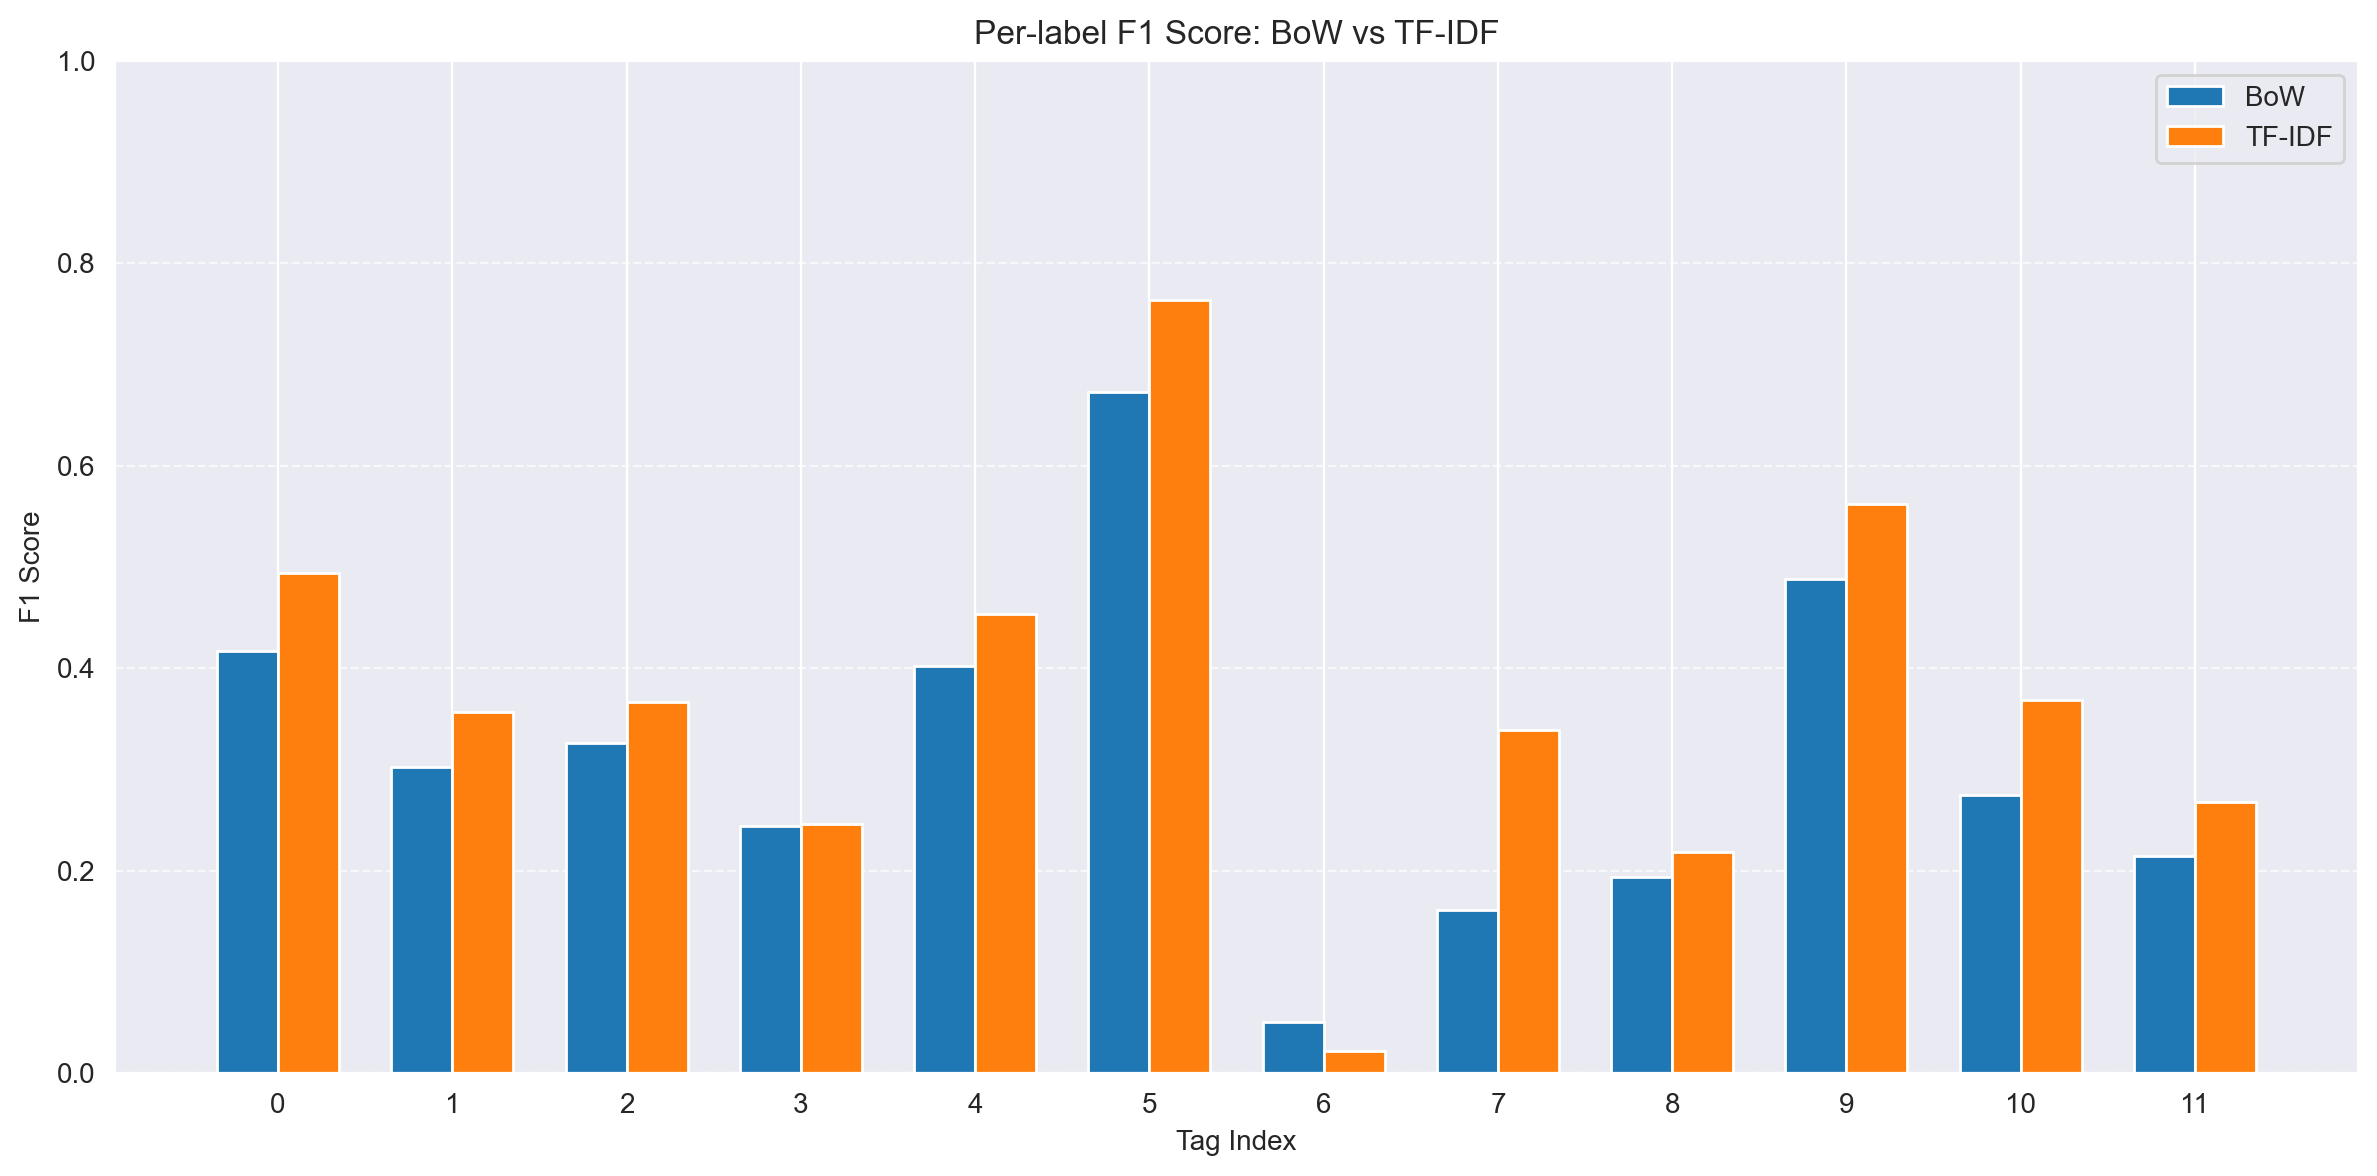

In [ ]:
from sklearn.metrics import classification_report

# Get classification reports as dictionaries
report_bow = classification_report(y_test_bow, y_pred_bow, output_dict=True)
report_tfidf = classification_report(y_test_tfidf, y_pred_tfidf, output_dict=True)

# Extract F1-scores for labels only (skip micro/macro/avg rows)
label_keys = [key for key in report_bow.keys() if key.isdigit()]
labels = [int(k) for k in label_keys]

f1_bow = [report_bow[str(k)]['f1-score'] for k in labels]
f1_tfidf = [report_tfidf[str(k)]['f1-score'] for k in labels]

# Plotting
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, f1_bow, width, label='BoW')
plt.bar(x + width/2, f1_tfidf, width, label='TF-IDF')

plt.xlabel('Tag Index')
plt.ylabel('F1 Score')
plt.title('Per-label F1 Score: BoW vs TF-IDF')
plt.xticks(x, labels)
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



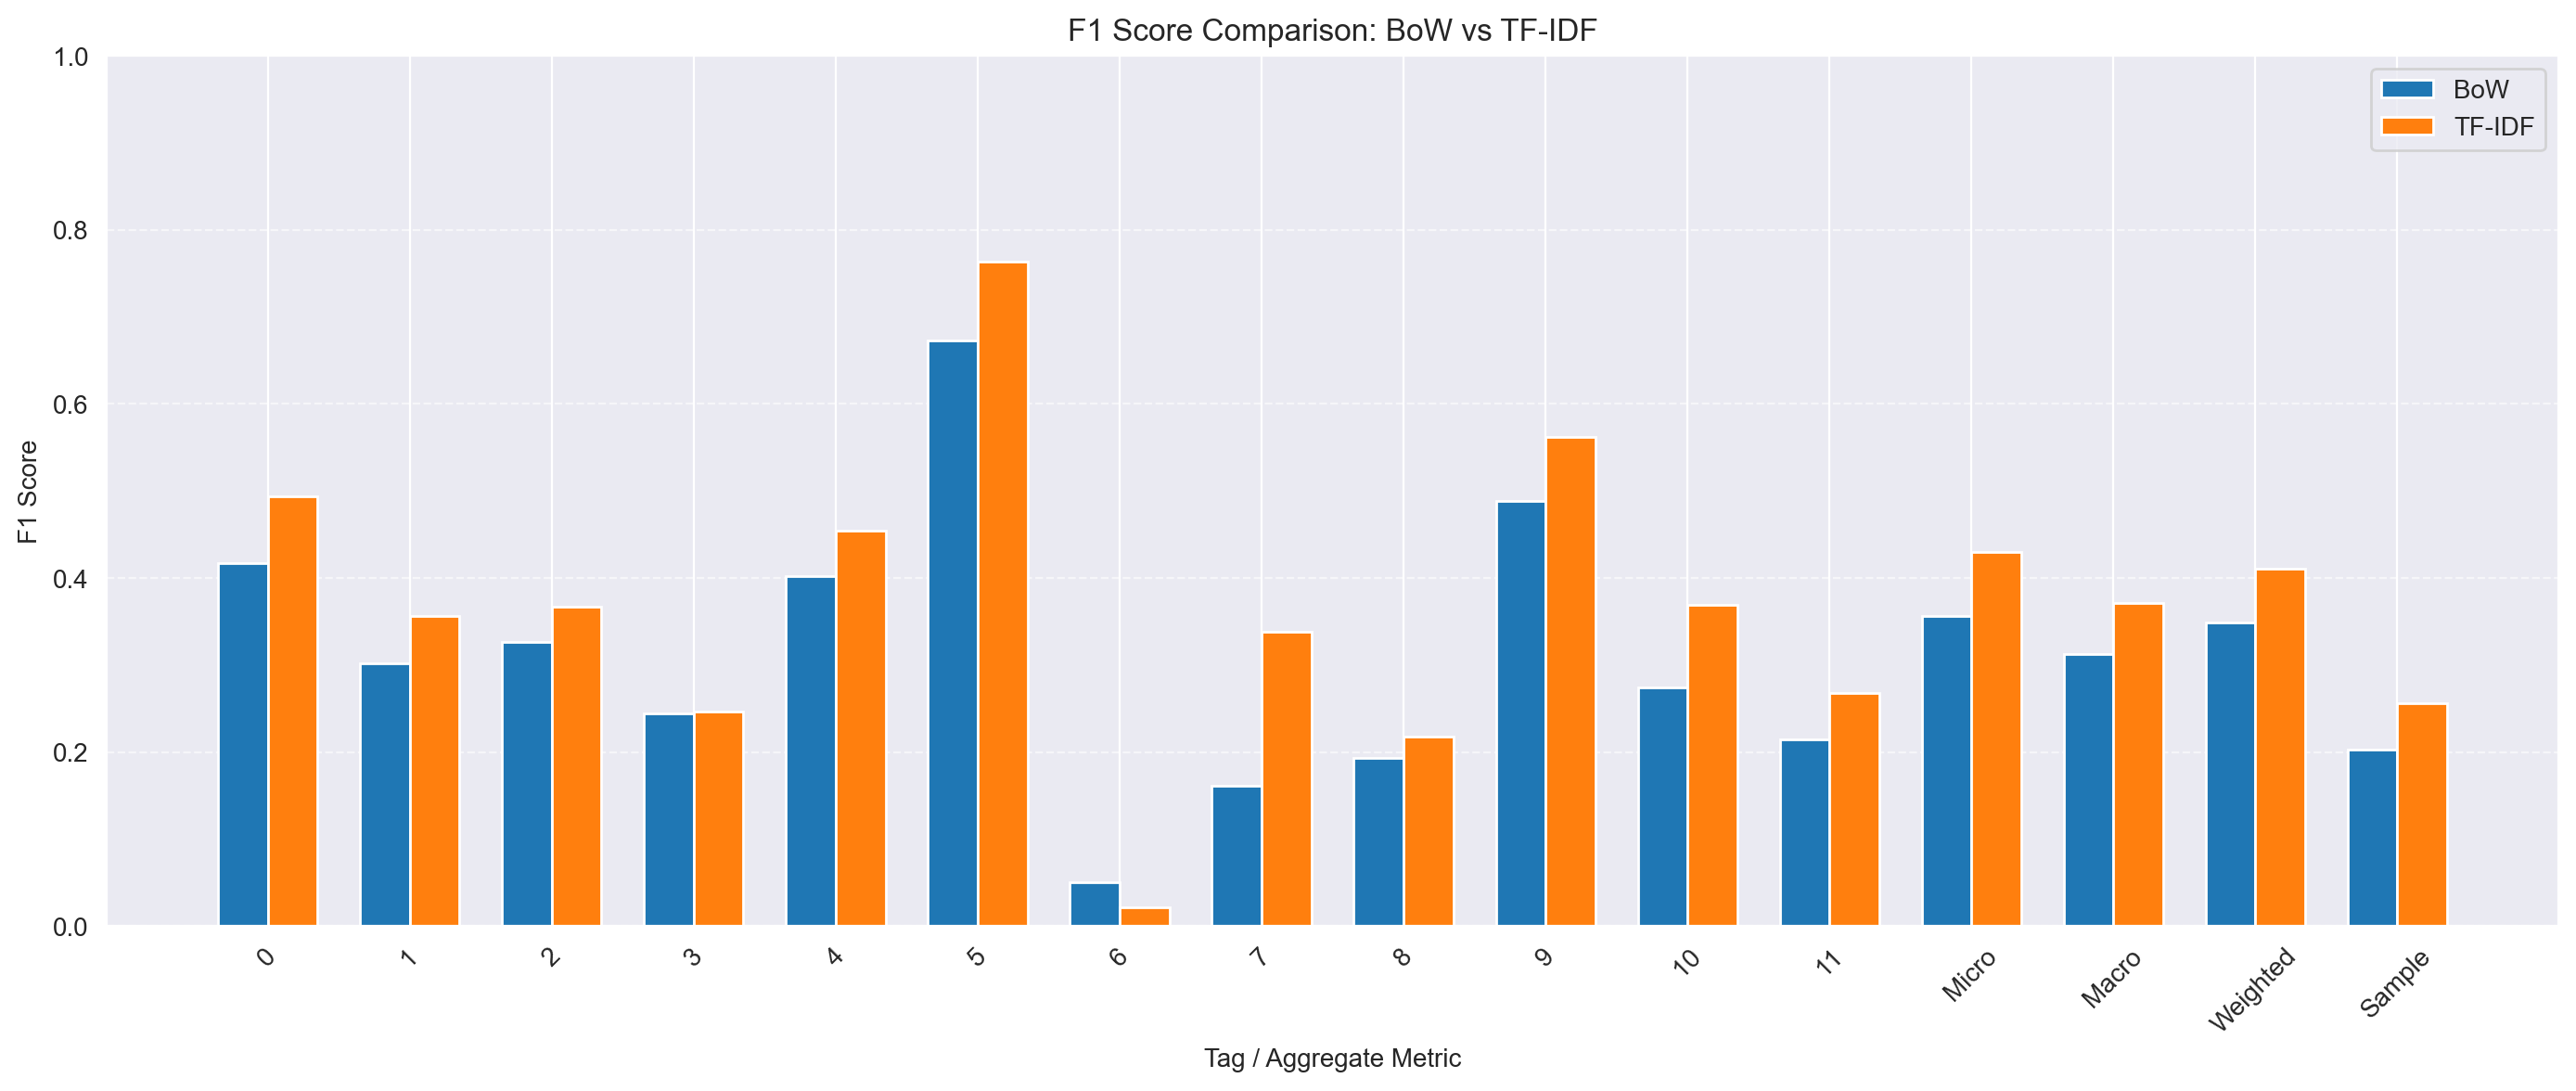

In [ ]:
from sklearn.metrics import classification_report

# Get classification reports
report_bow = classification_report(y_test_bow, y_pred_bow, output_dict=True)
report_tfidf = classification_report(y_test_tfidf, y_pred_tfidf, output_dict=True)

# Extract per-label F1-scores
label_keys = [key for key in report_bow.keys() if key.isdigit()]
labels = [int(k) for k in label_keys]

f1_bow = [report_bow[str(k)]['f1-score'] for k in labels]
f1_tfidf = [report_tfidf[str(k)]['f1-score'] for k in labels]

# Add aggregate metrics
aggregate_labels = ['micro avg', 'macro avg', 'weighted avg', 'samples avg']
labels += aggregate_labels
f1_bow += [report_bow[k]['f1-score'] for k in aggregate_labels]
f1_tfidf += [report_tfidf[k]['f1-score'] for k in aggregate_labels]

# Plotting
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(14, 6))
plt.bar(x - width/2, f1_bow, width, label='BoW')
plt.bar(x + width/2, f1_tfidf, width, label='TF-IDF')

# Label formatting
xtick_labels = [str(l) for l in labels]
xtick_labels[-4:] = ['Micro', 'Macro', 'Weighted', 'Sample']

plt.xticks(x, xtick_labels, rotation=45)
plt.xlabel('Tag / Aggregate Metric')
plt.ylabel('F1 Score')
plt.title('F1 Score Comparison: BoW vs TF-IDF')
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



TF-IDF seems to perform better on this specific multilabel classification than BoW.

## 2.2. Clustering

We are now going to focus on processing the data and creating different representations but now aimed at clustering tasks, that is, not taking into account the spcific pre-processing for classification





In [118]:
# Process and replace fulltext_clean
docs_fulltext2 = list(nlp.pipe(questions_filtered['fulltext_clean'],batch_size=50))
D = Dictionary(docs_fulltext2)
lower_limit = 2
upper_limit = .80

D.filter_extremes(no_below=lower_limit,no_above=upper_limit)
n_tokens = len(D)

print('The dictionary contains', n_tokens, 'terms')

The dictionary contains 14065 terms


In [119]:
bow = [D.doc2bow(doc) for doc in docs_fulltext2]
tfidf = TfidfModel(bow)

n_tokens = len(D)
num_docs = len(bow)
corpus_bow_sparse = corpus2csc(bow, num_terms=n_tokens, num_docs=num_docs).T
corpus_tfidf_sparse = corpus2csc(tfidf[bow], num_terms=n_tokens, num_docs=num_docs).T

In [120]:
word2vec = Word2Vec(sentences=docs_fulltext2, vector_size=100, window=5, min_count=1, workers=4)

word_vectors = word2vec.wv

word_vectors.save("model_w2v.wordvectors")
wv = KeyedVectors.load("model_w2v.wordvectors", mmap='r')

In [121]:
from gensim.models.ldamodel import LdaModel
num_topics = 10
ldag = LdaModel(corpus=bow, id2word=D, num_topics=num_topics)

# Get topic distributions for all documents
lda_vectors = []
for bow_doc in bow:
    topic_dist = ldag.get_document_topics(bow_doc, minimum_probability=0)
    lda_vectors.append([prob for _, prob in topic_dist])

lda_vectors = np.array(lda_vectors)
print("LDA topic matrix shape:", lda_vectors.shape)

LDA topic matrix shape: (11278, 10)


Define a function to help determine the optimal number of clusters (k) for K-Means clustering

In [122]:
# Set default style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Helper function to evaluate KMeans
def evaluate_kmeans(X, k_range):
    inertias = []
    silhouettes = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
        labels = kmeans.fit_predict(X)
        inertias.append(kmeans.inertia_)
        silhouette = silhouette_score(X, labels)
        silhouettes.append(silhouette)
    return inertias, silhouettes


### TF-IDF representation

In [123]:
X_tfidf = corpus_tfidf_sparse.toarray()

# Evaluate KMeans on TF-IDF representation
print("\nEvaluating TF-IDF representation")
k_range = range(2, 11)
inertia_tfidf, silhouette_tfidf = evaluate_kmeans(X_tfidf, k_range)


Evaluating TF-IDF representation


Plot evaluation metrics for TF-IDF

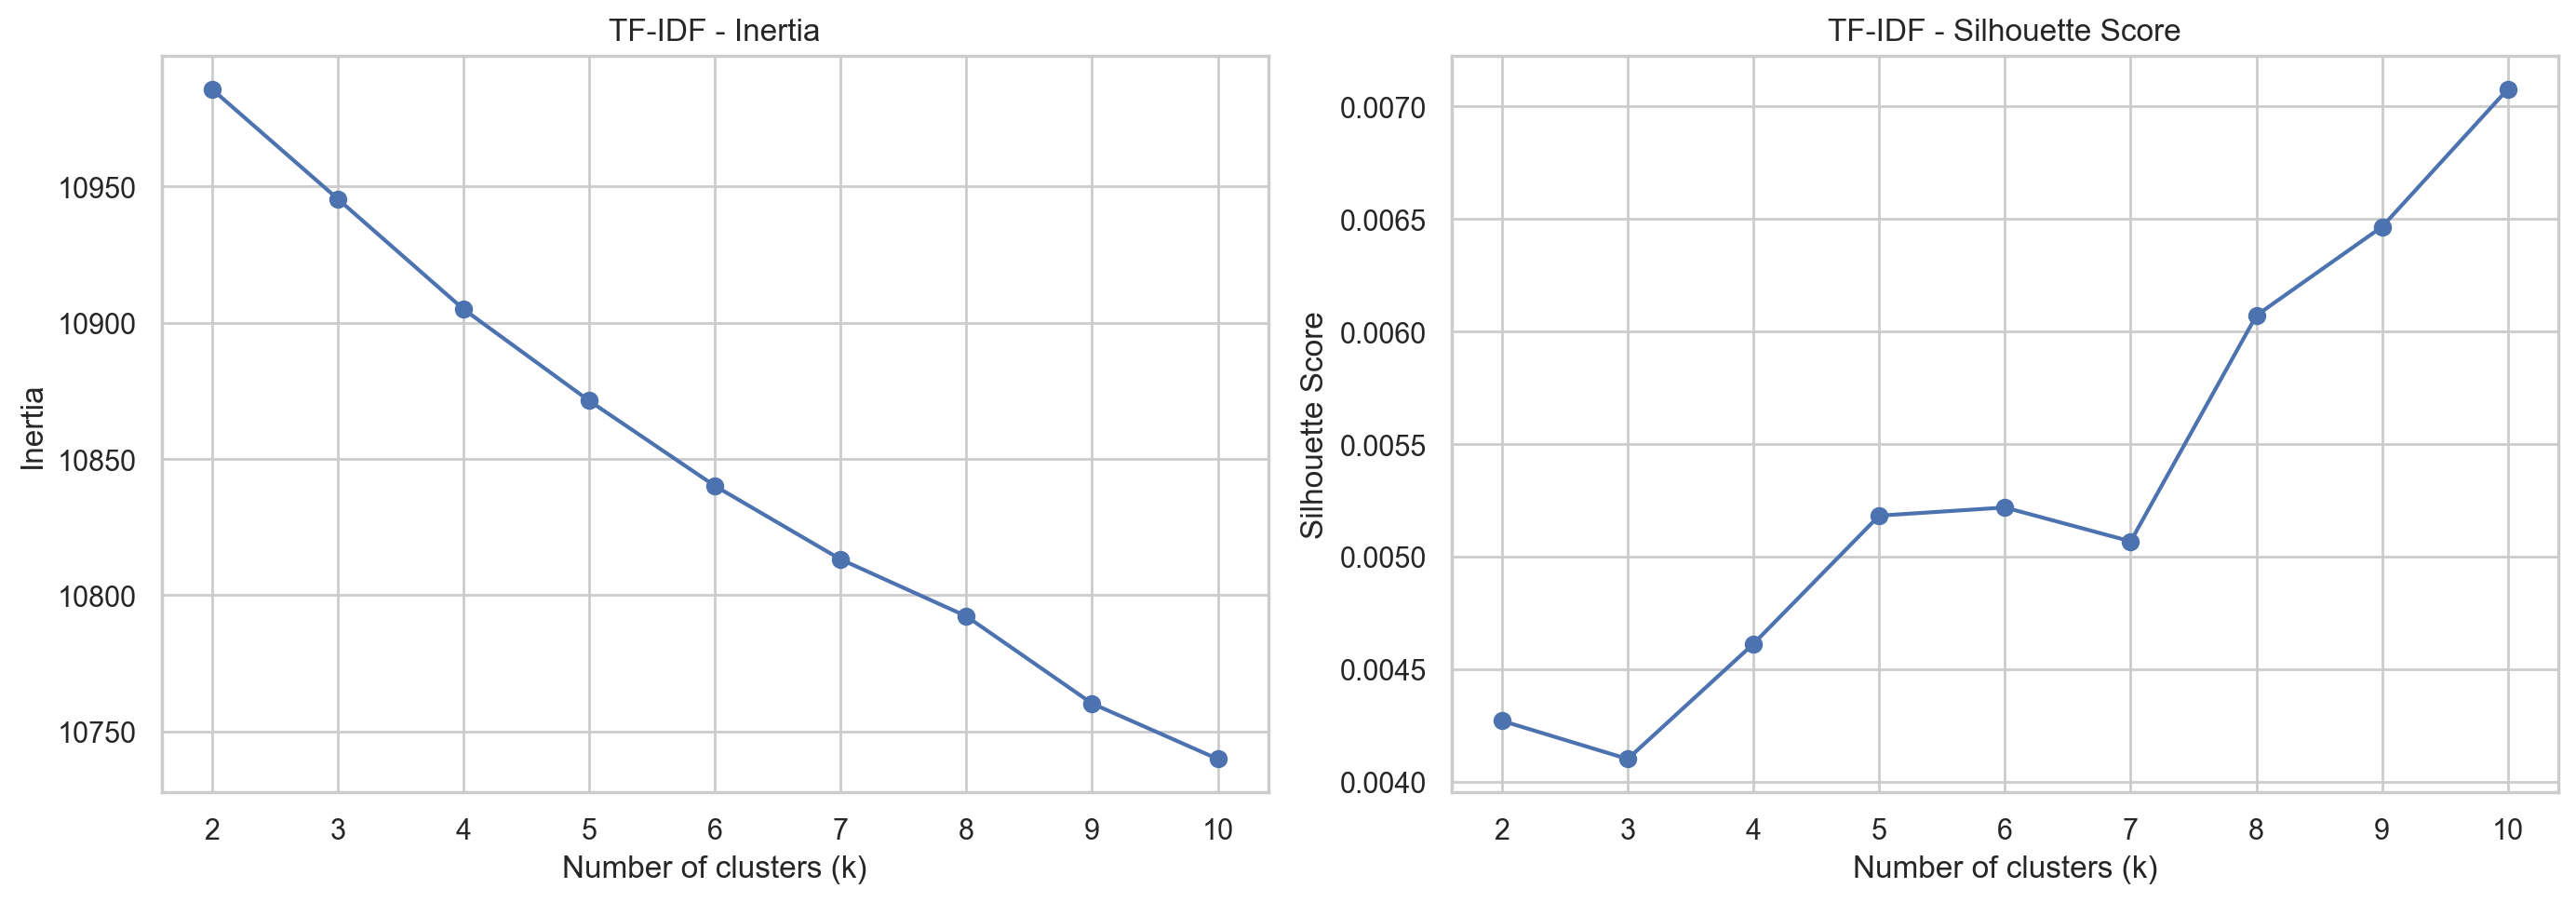

In [124]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia_tfidf, marker='o')
plt.title('TF-IDF - Inertia')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_tfidf, marker='o')
plt.title('TF-IDF - Silhouette Score')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

In [125]:
# Optimal k based on max silhouette score
best_k_tfidf = k_range[np.argmax(silhouette_tfidf)]
print(f"Optimal number of clusters for TF-IDF: {best_k_tfidf}")

Optimal number of clusters for TF-IDF: 10


Fit KMeans with that optimal k for TF-IDF

In [126]:
# Fit KMeans with optimal k for TF-IDF
kmeans_tfidf = KMeans(n_clusters=best_k_tfidf, random_state=42, n_init='auto')
labels_tfidf = kmeans_tfidf.fit_predict(X_tfidf)

questions_filtered['cluster_tfidf'] = labels_tfidf

Analyze the cluster distribution

In [127]:
cluster_counts_tfidf = pd.Series(labels_tfidf).value_counts().sort_index()
print(f"\nCluster distribution for TF-IDF:")
print(cluster_counts_tfidf)


Cluster distribution for TF-IDF:
0     781
1    2161
2    1432
3     225
4    3243
5    1001
6     203
7     561
8     445
9    1226
Name: count, dtype: int64


In [128]:
# Get top terms for TF-IDF clusters
print("\nTop terms per cluster (TF-IDF):")
centroids_tfidf = kmeans_tfidf.cluster_centers_
for i, centroid in enumerate(centroids_tfidf):
    top_indices = centroid.argsort()[::-1][:10]
    top_terms = [D[j] for j in top_indices]
    print(f"Cluster {i}: {', '.join(top_terms)}")


Top terms per cluster (TF-IDF):
Cluster 0: table, column, query, database, sql, entity, row, migration, index, model
Cluster 1: string, value, character, number, line, format, function, return, date, list
Cluster 2: class, object, type, method, function, test, constructor, variable, parameter, static
Cluster 3: array, element, object, string, value, loop, index, function, return, key
Cluster 4: server, app, user, request, rail, application, run, file, error, service
Cluster 5: element, event, div, button, bootstrap, css, width, page, jquery, scroll
Cluster 6: thread, lock, task, queue, wait, async, run, operation, block, method
Cluster 7: view, controller, model, route, action, method, layout, rail, helper, template
Cluster 8: image, color, font, fragment, background, icon, text, button, alpha, pixel
Cluster 9: file, project, studio, visual, directory, folder, build, path, command, package


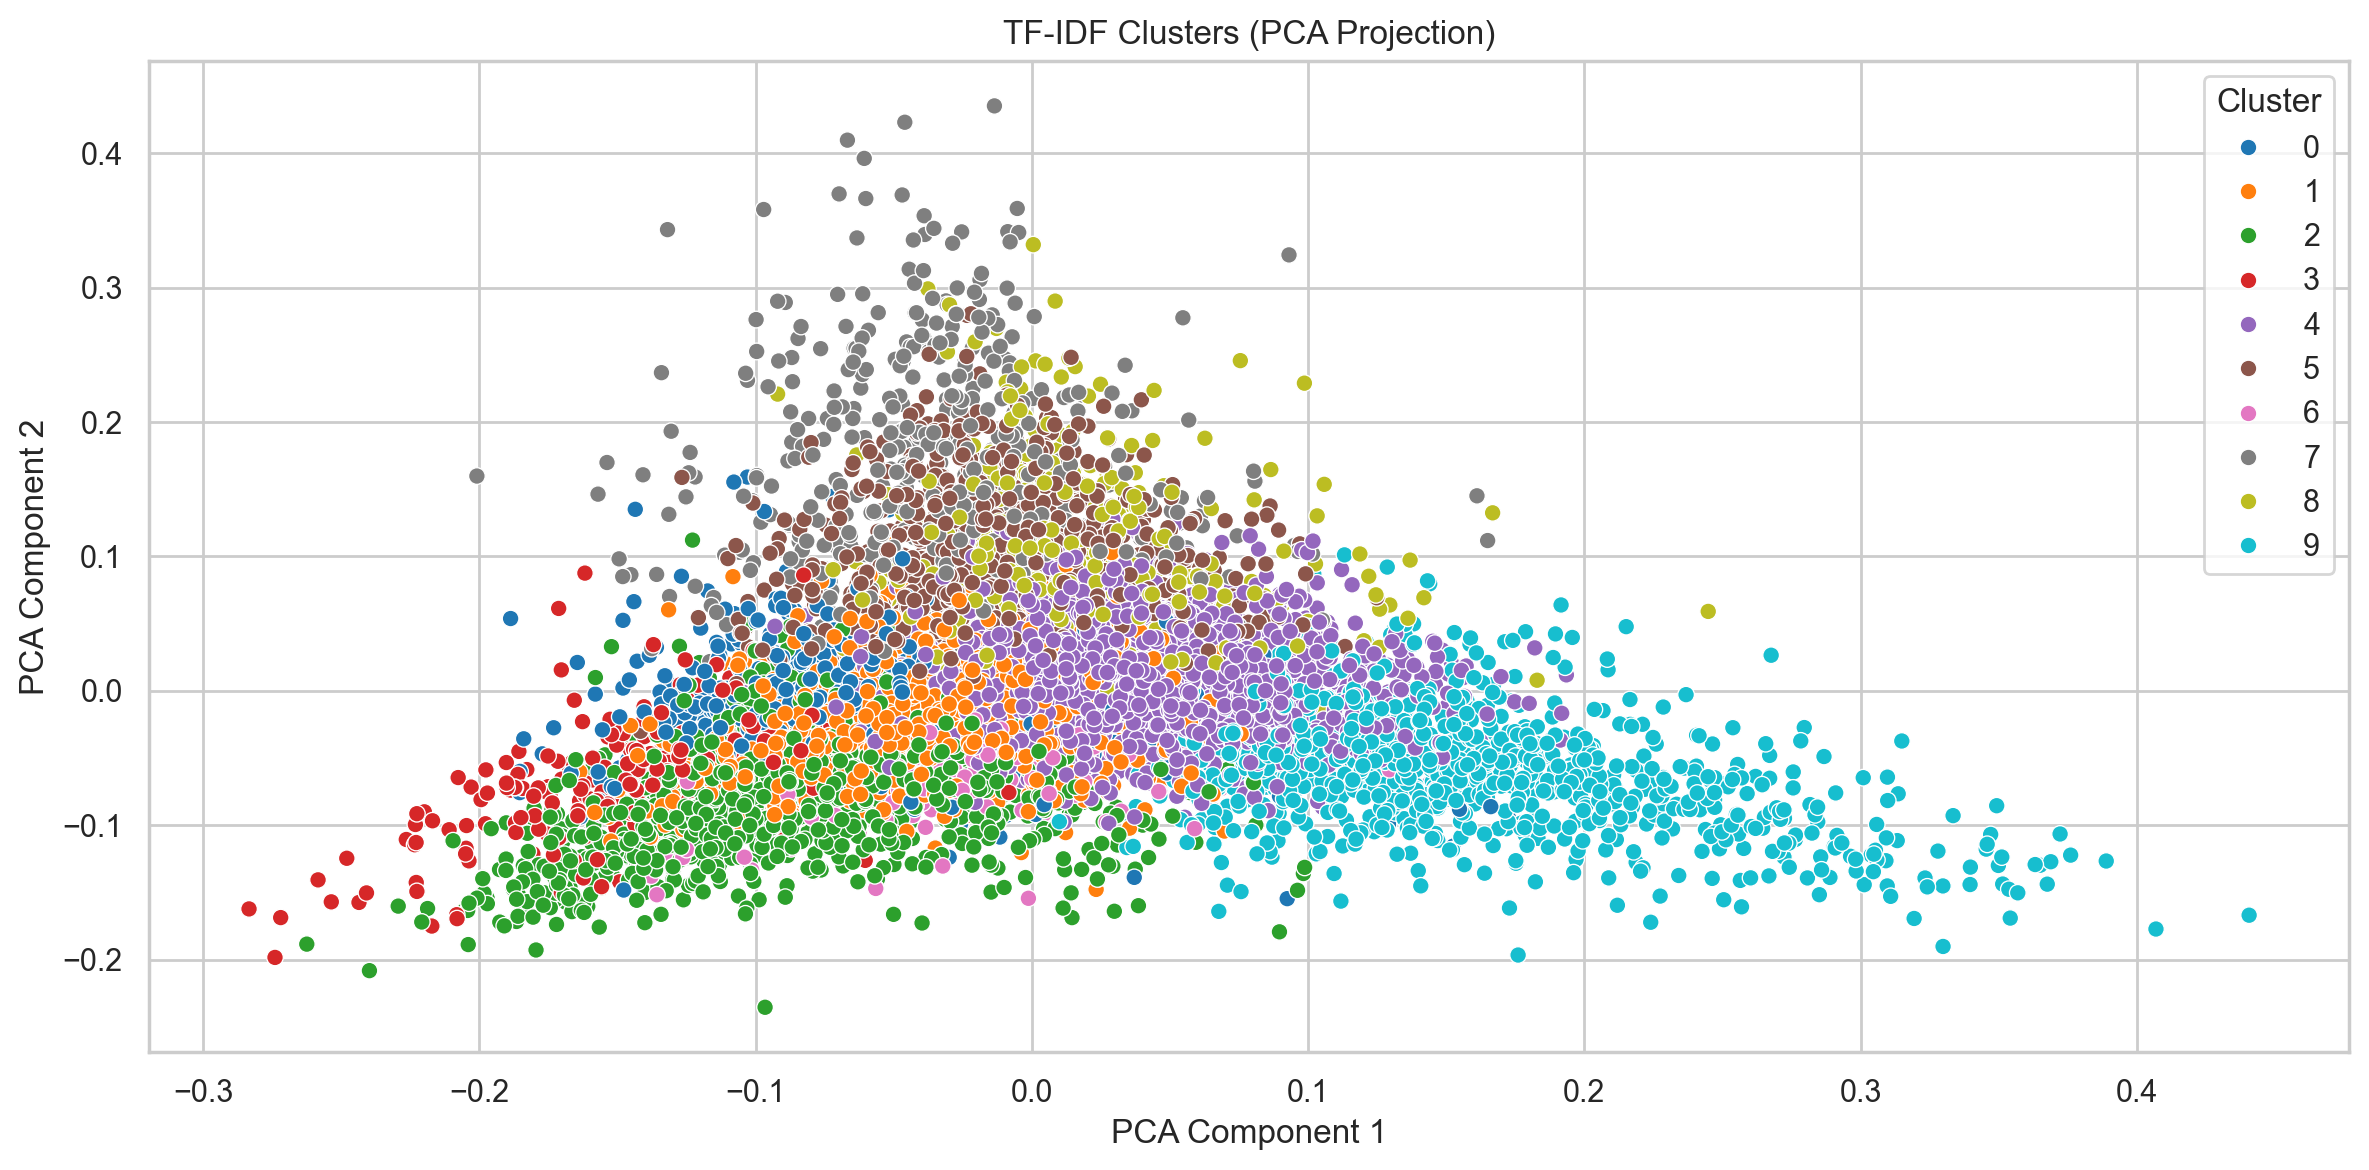

In [129]:
pca_tfidf = PCA(n_components=2, random_state=42)
X_2d_tfidf = pca_tfidf.fit_transform(X_tfidf)
plt.figure()
sns.scatterplot(x=X_2d_tfidf[:, 0], y=X_2d_tfidf[:, 1], hue=labels_tfidf, palette='tab10')
plt.title('TF-IDF Clusters (PCA Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title="Cluster", loc='best')
plt.tight_layout()
plt.show()


### LDA representations

In [130]:
X_lda = lda_vectors

# Evaluate KMeans on the LDA representation
print("\nEvaluating LDA representation")
k_range = range(2, 21)
inertia_lda, silhouette_lda = evaluate_kmeans(X_lda, k_range)


Evaluating LDA representation


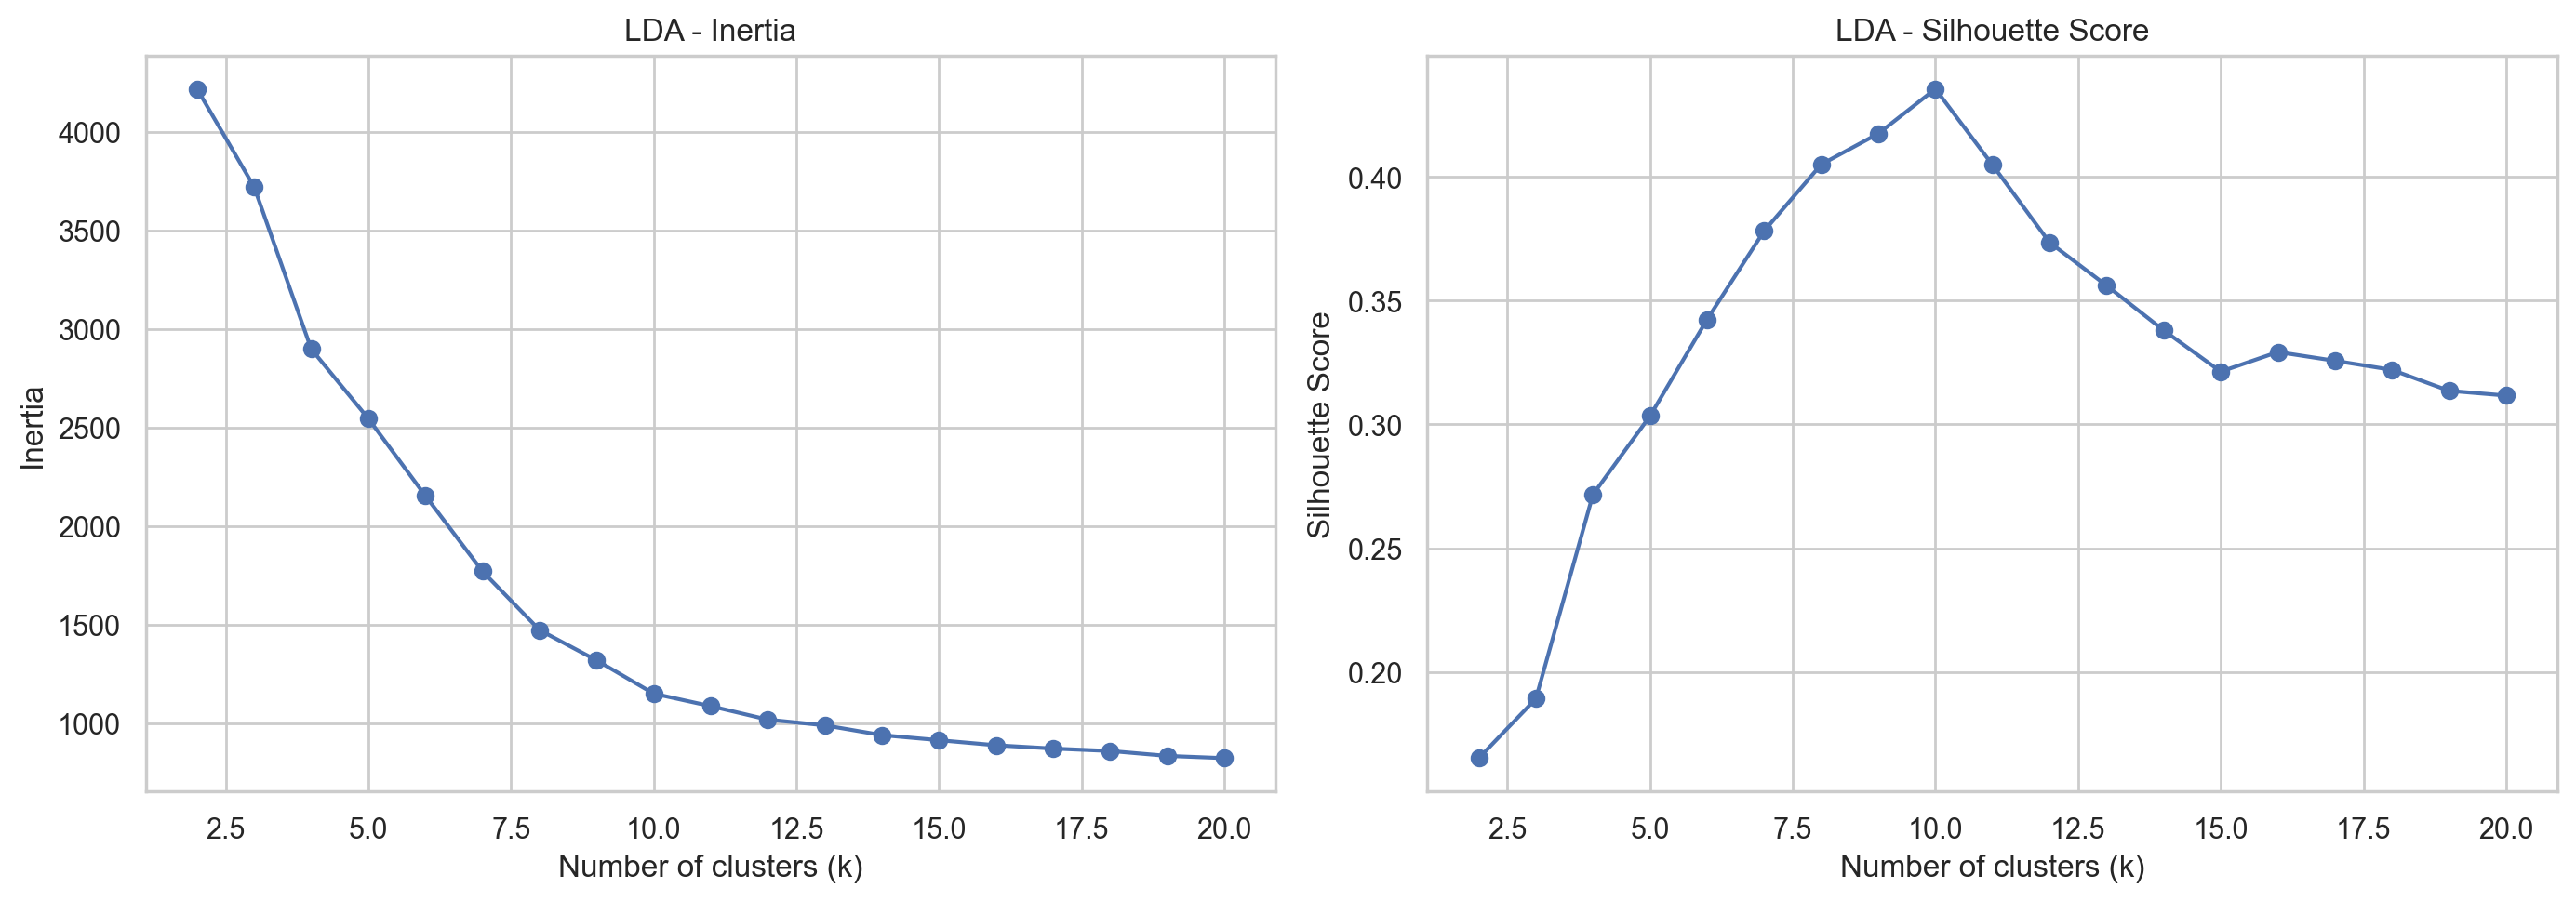

In [131]:
# Plot evaluation metrics
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia_lda, marker='o')
plt.title('LDA - Inertia')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_lda, marker='o')
plt.title('LDA - Silhouette Score')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

Select the best number of clusters based on the highest silhouette score

In [132]:
best_k_lda = k_range[np.argmax(silhouette_lda)]
print(f"Optimal number of clusters for LDA: {best_k_lda}")

Optimal number of clusters for LDA: 10


In [133]:
# Fit KMeans using the optimal number of clusters
kmeans_lda = KMeans(n_clusters=best_k_lda, random_state=42, n_init='auto')
labels_lda = kmeans_lda.fit_predict(X_lda)

# Save cluster labels to the dataframe
questions_filtered['cluster_lda'] = labels_lda

# Print cluster distribution
cluster_counts_lda = pd.Series(labels_lda).value_counts().sort_index()
print("\nCluster distribution for LDA:")
print(cluster_counts_lda)


Cluster distribution for LDA:
0    1821
1    1004
2    2068
3     706
4    1005
5    1114
6    1026
7    1269
8     596
9     669
Name: count, dtype: int64


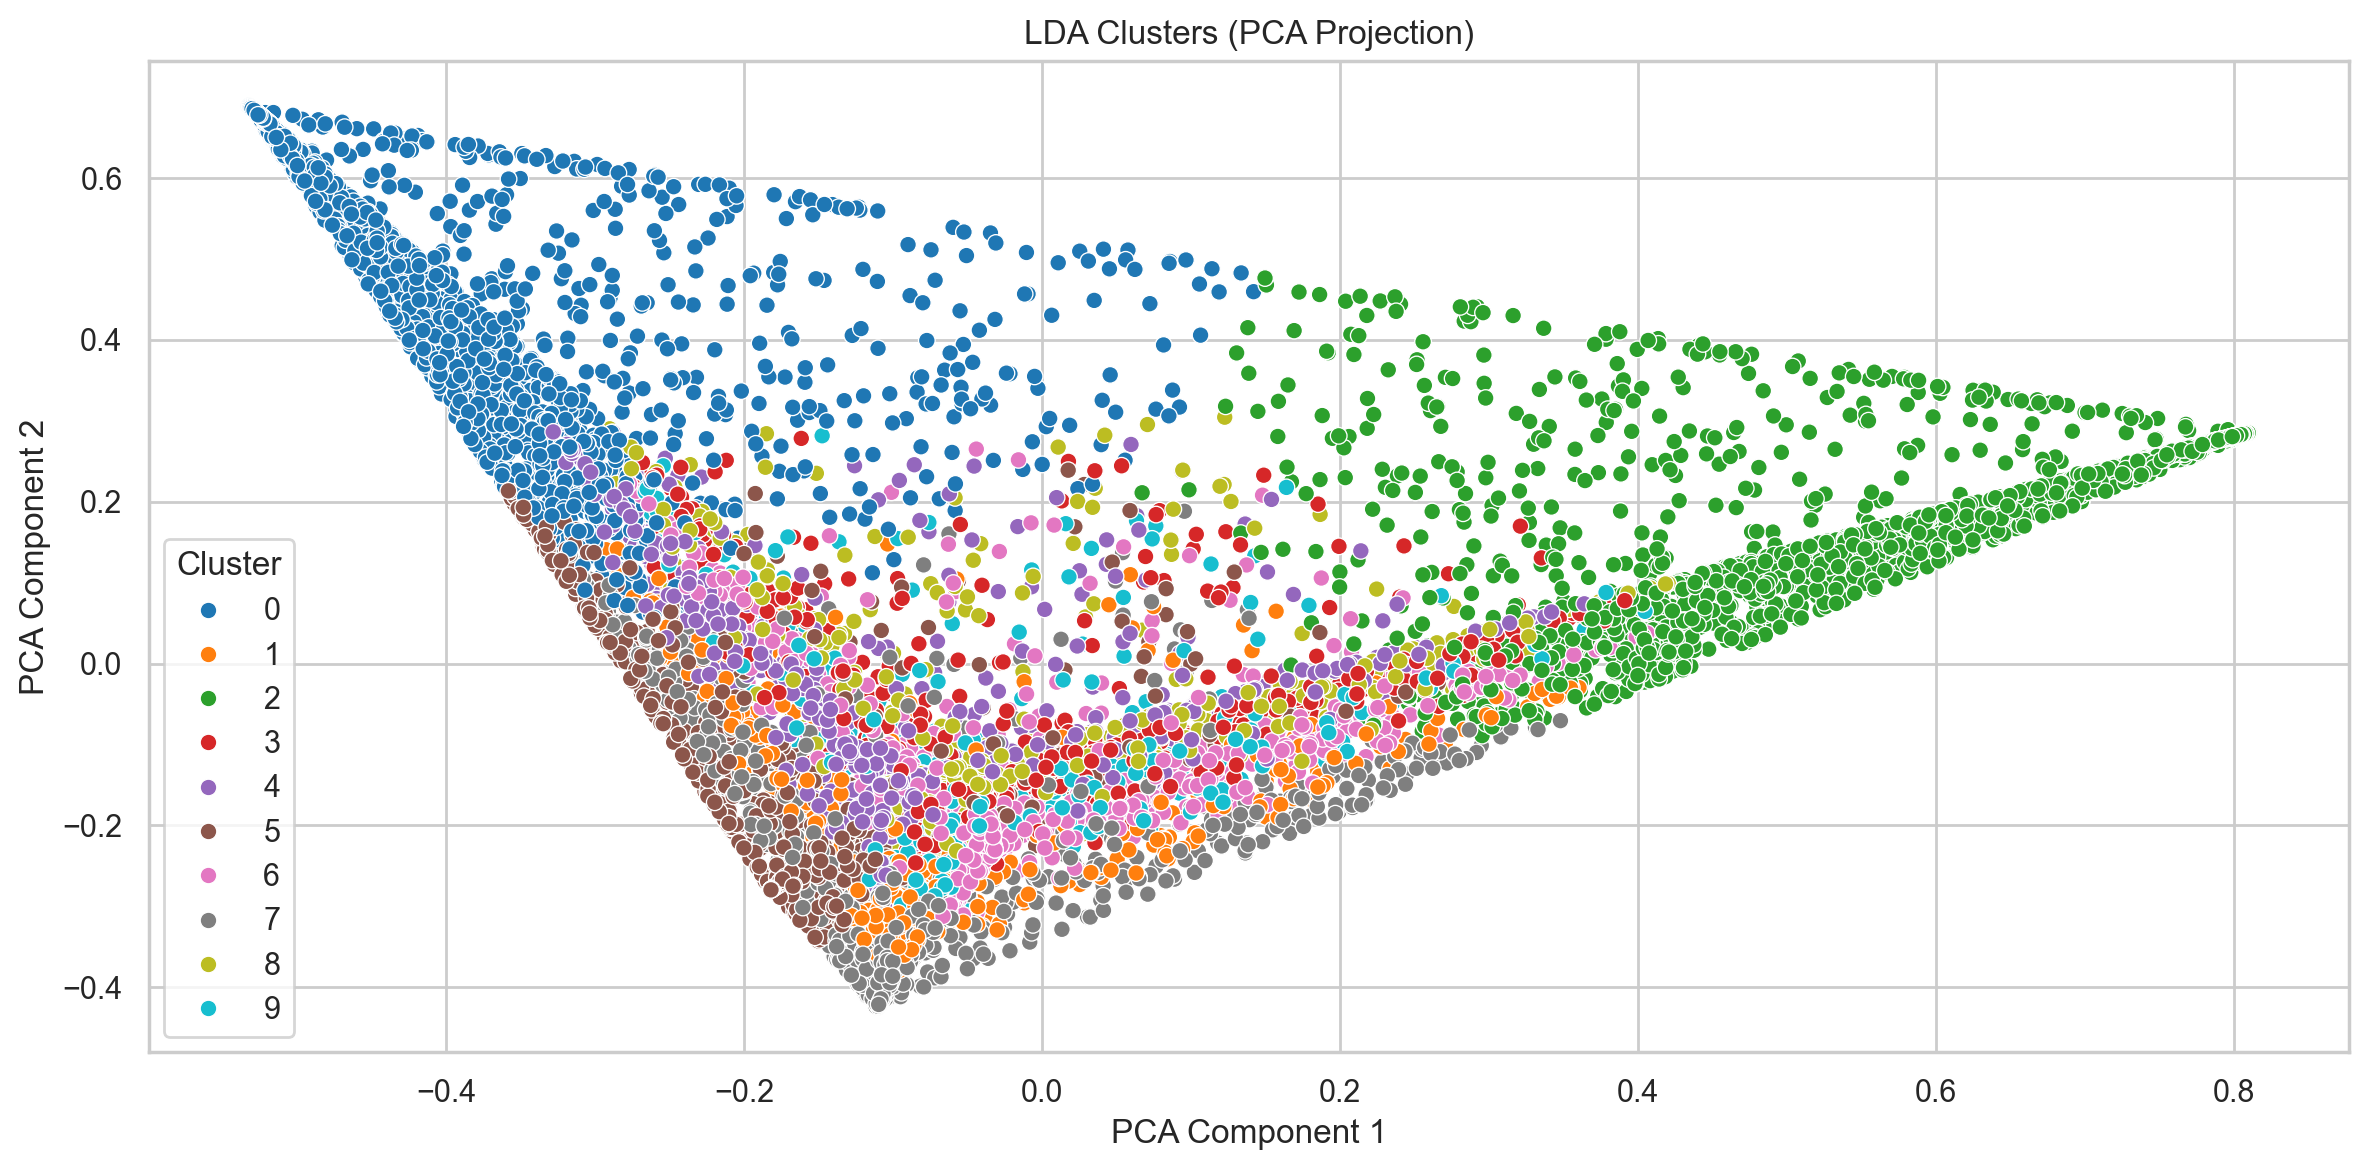

In [134]:
pca_lda = PCA(n_components=2, random_state=42)
X_2d_lda = pca_lda.fit_transform(X_lda)
plt.figure()
sns.scatterplot(x=X_2d_lda[:, 0], y=X_2d_lda[:, 1], hue=labels_lda, palette='tab10')
plt.title('LDA Clusters (PCA Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title="Cluster", loc='best')
plt.tight_layout()
plt.show()


 Identify and display the most relevant words associated with each cluster obtained from the K-Means clustering

In [135]:
# Show top terms per cluster based on dominant LDA topics
print("\nTop terms per cluster (LDA):")
centroids_lda = kmeans_lda.cluster_centers_

# Display top terms for the most representative LDA topics per cluster
for i, centroid in enumerate(centroids_lda):
    # Get indices of the most dominant topics in the cluster center
    top_topic_indices = centroid.argsort()[::-1][:5]
    # Ensure indices are within valid topic range
    top_topic_indices = [idx for idx in top_topic_indices if idx < ldag.num_topics]

    print(f"\nCluster {i}:")
    for topic_idx in top_topic_indices:
        top_terms = ldag.show_topic(topic_idx, topn=5)  # top 5 terms for the topic
        term_list = ', '.join([term for term, _ in top_terms])
        print(f"  Topic {topic_idx}: {term_list}")


Top terms per cluster (LDA):

Cluster 0:
  Topic 8: use, object, value, like, type
  Topic 6: function, use, value, type, code
  Topic 3: class, method, code, test, use
  Topic 1: view, app, use, controller, work
  Topic 7: file, work, use, run, project

Cluster 1:
  Topic 5: use, work, set, add, change
  Topic 1: view, app, use, controller, work
  Topic 6: function, use, value, type, code
  Topic 8: use, object, value, like, type
  Topic 7: file, work, use, run, project

Cluster 2:
  Topic 7: file, work, use, run, project
  Topic 1: view, app, use, controller, work
  Topic 2: thread, use, request, user, server
  Topic 8: use, object, value, like, type
  Topic 3: class, method, code, test, use

Cluster 3:
  Topic 4: use, file, work, chrome, like
  Topic 7: file, work, use, run, project
  Topic 8: use, object, value, like, type
  Topic 6: function, use, value, type, code
  Topic 1: view, app, use, controller, work

Cluster 4:
  Topic 3: class, method, code, test, use
  Topic 8: use, ob

### Word2Vec Embeddings

In [136]:
# Set visual style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Function to get the average Word2Vec vector for a document
def document_vector(doc, model):
    words = [word for word in doc if word in model.key_to_index]
    if words:
        return np.mean(model[words], axis=0)
    else:
        return np.zeros(model.vector_size)

In [137]:
X_w2v = np.array([document_vector(doc, wv) for doc in docs_fulltext2])

def evaluate_kmeans(X, k_range):
    inertias = []
    silhouettes = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
        labels = kmeans.fit_predict(X)
        inertias.append(kmeans.inertia_)
        silhouette = silhouette_score(X, labels)
        silhouettes.append(silhouette)
    return inertias, silhouettes

print("\nEvaluating Word2Vec representation...")
k_range = range(2, 11)
inertia_w2v, silhouette_w2v = evaluate_kmeans(X_w2v, k_range)


Evaluating Word2Vec representation...


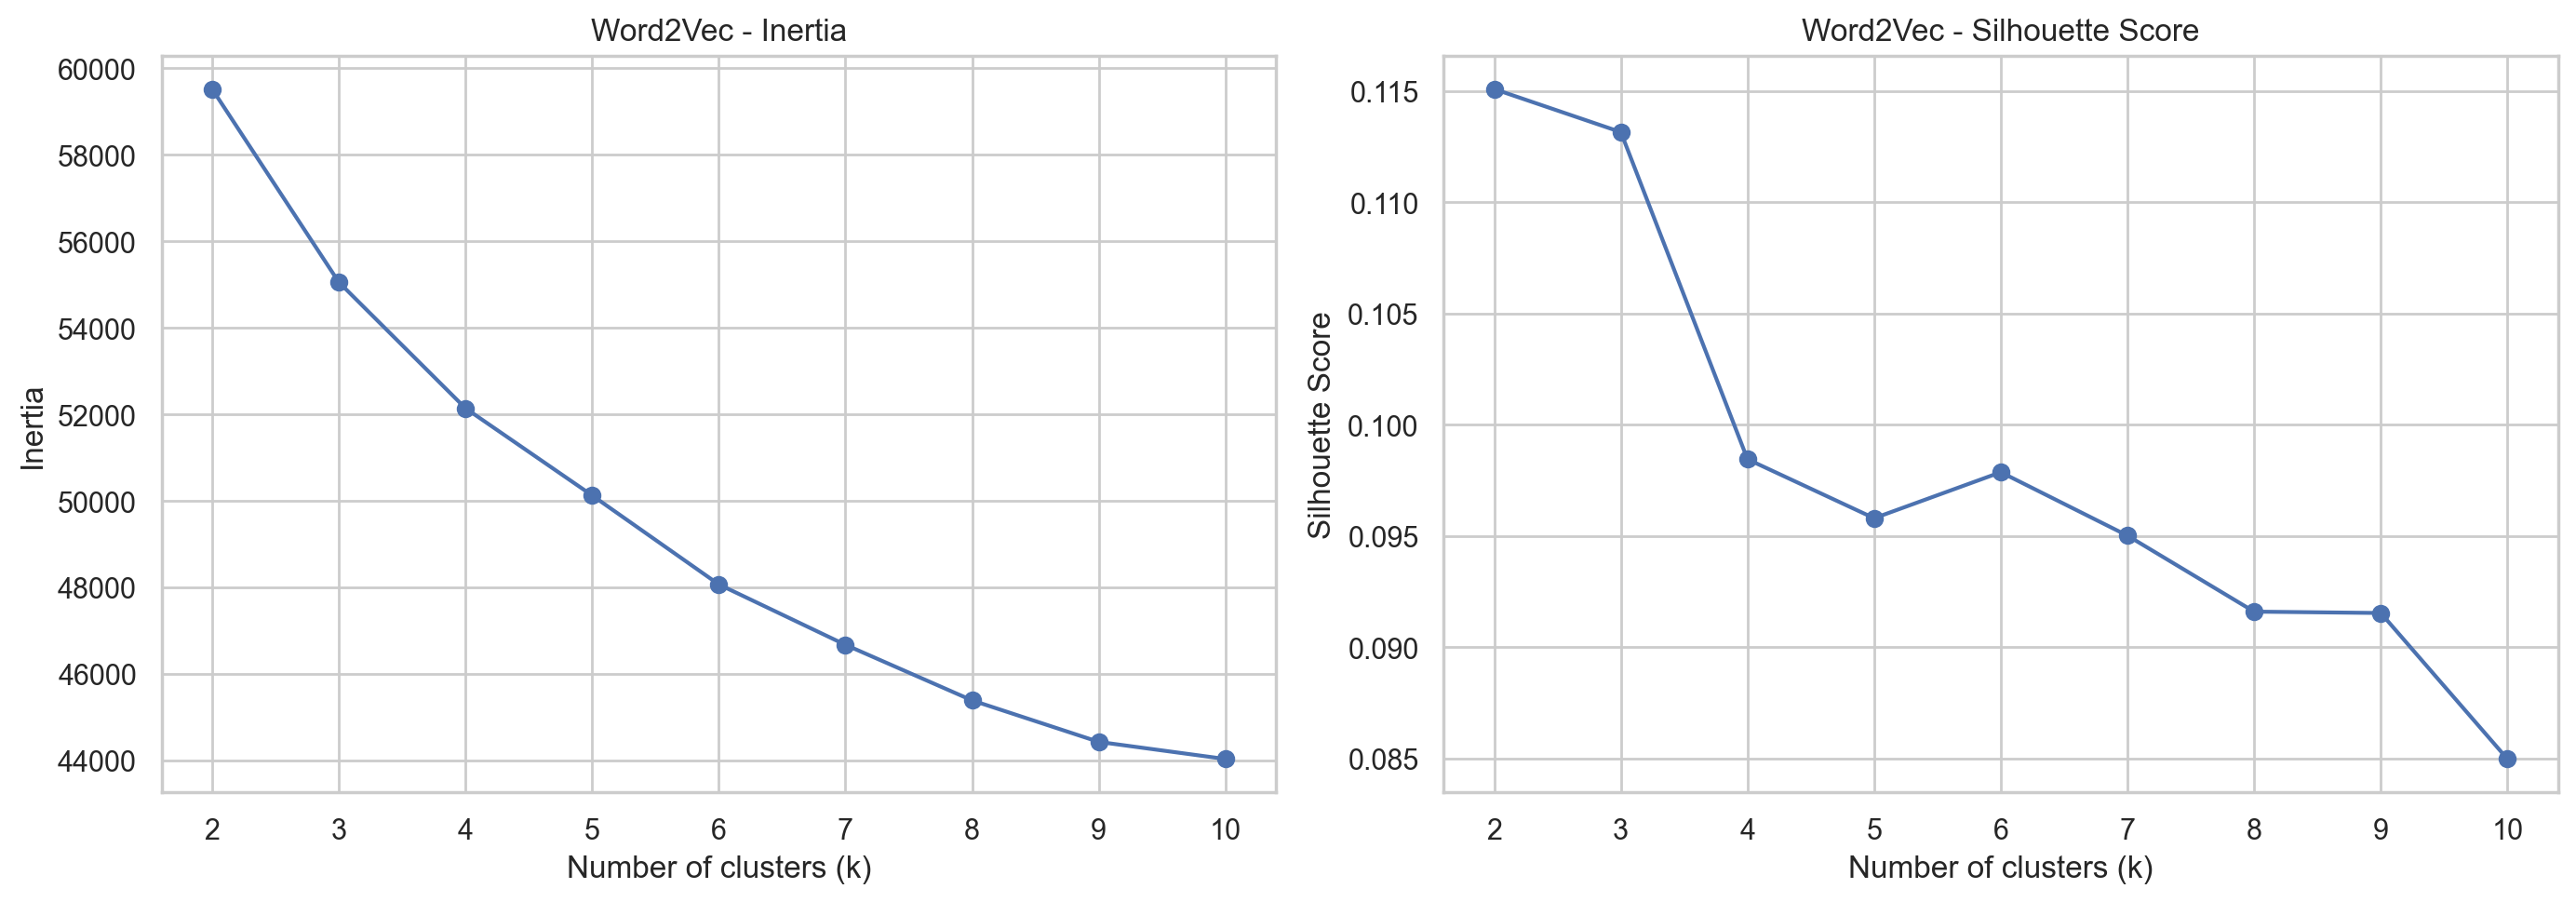

In [138]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia_w2v, marker='o')
plt.title('Word2Vec - Inertia')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_w2v, marker='o')
plt.title('Word2Vec - Silhouette Score')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

In [139]:
best_k_w2v = k_range[np.argmax(silhouette_w2v)]
print(f"Best number of clusters for Word2Vec: {best_k_w2v}")

Best number of clusters for Word2Vec: 2


In [140]:
# Fit KMeans with the best k
kmeans_w2v = KMeans(n_clusters=best_k_w2v, random_state=42, n_init='auto')
labels_w2v = kmeans_w2v.fit_predict(X_w2v)

questions_filtered['cluster_w2v'] = labels_w2v

In [141]:
cluster_counts_w2v = pd.Series(labels_w2v).value_counts().sort_index()
print("\nCluster distribution for Word2Vec:")
print(cluster_counts_w2v)


Cluster distribution for Word2Vec:
0    6509
1    4769
Name: count, dtype: int64


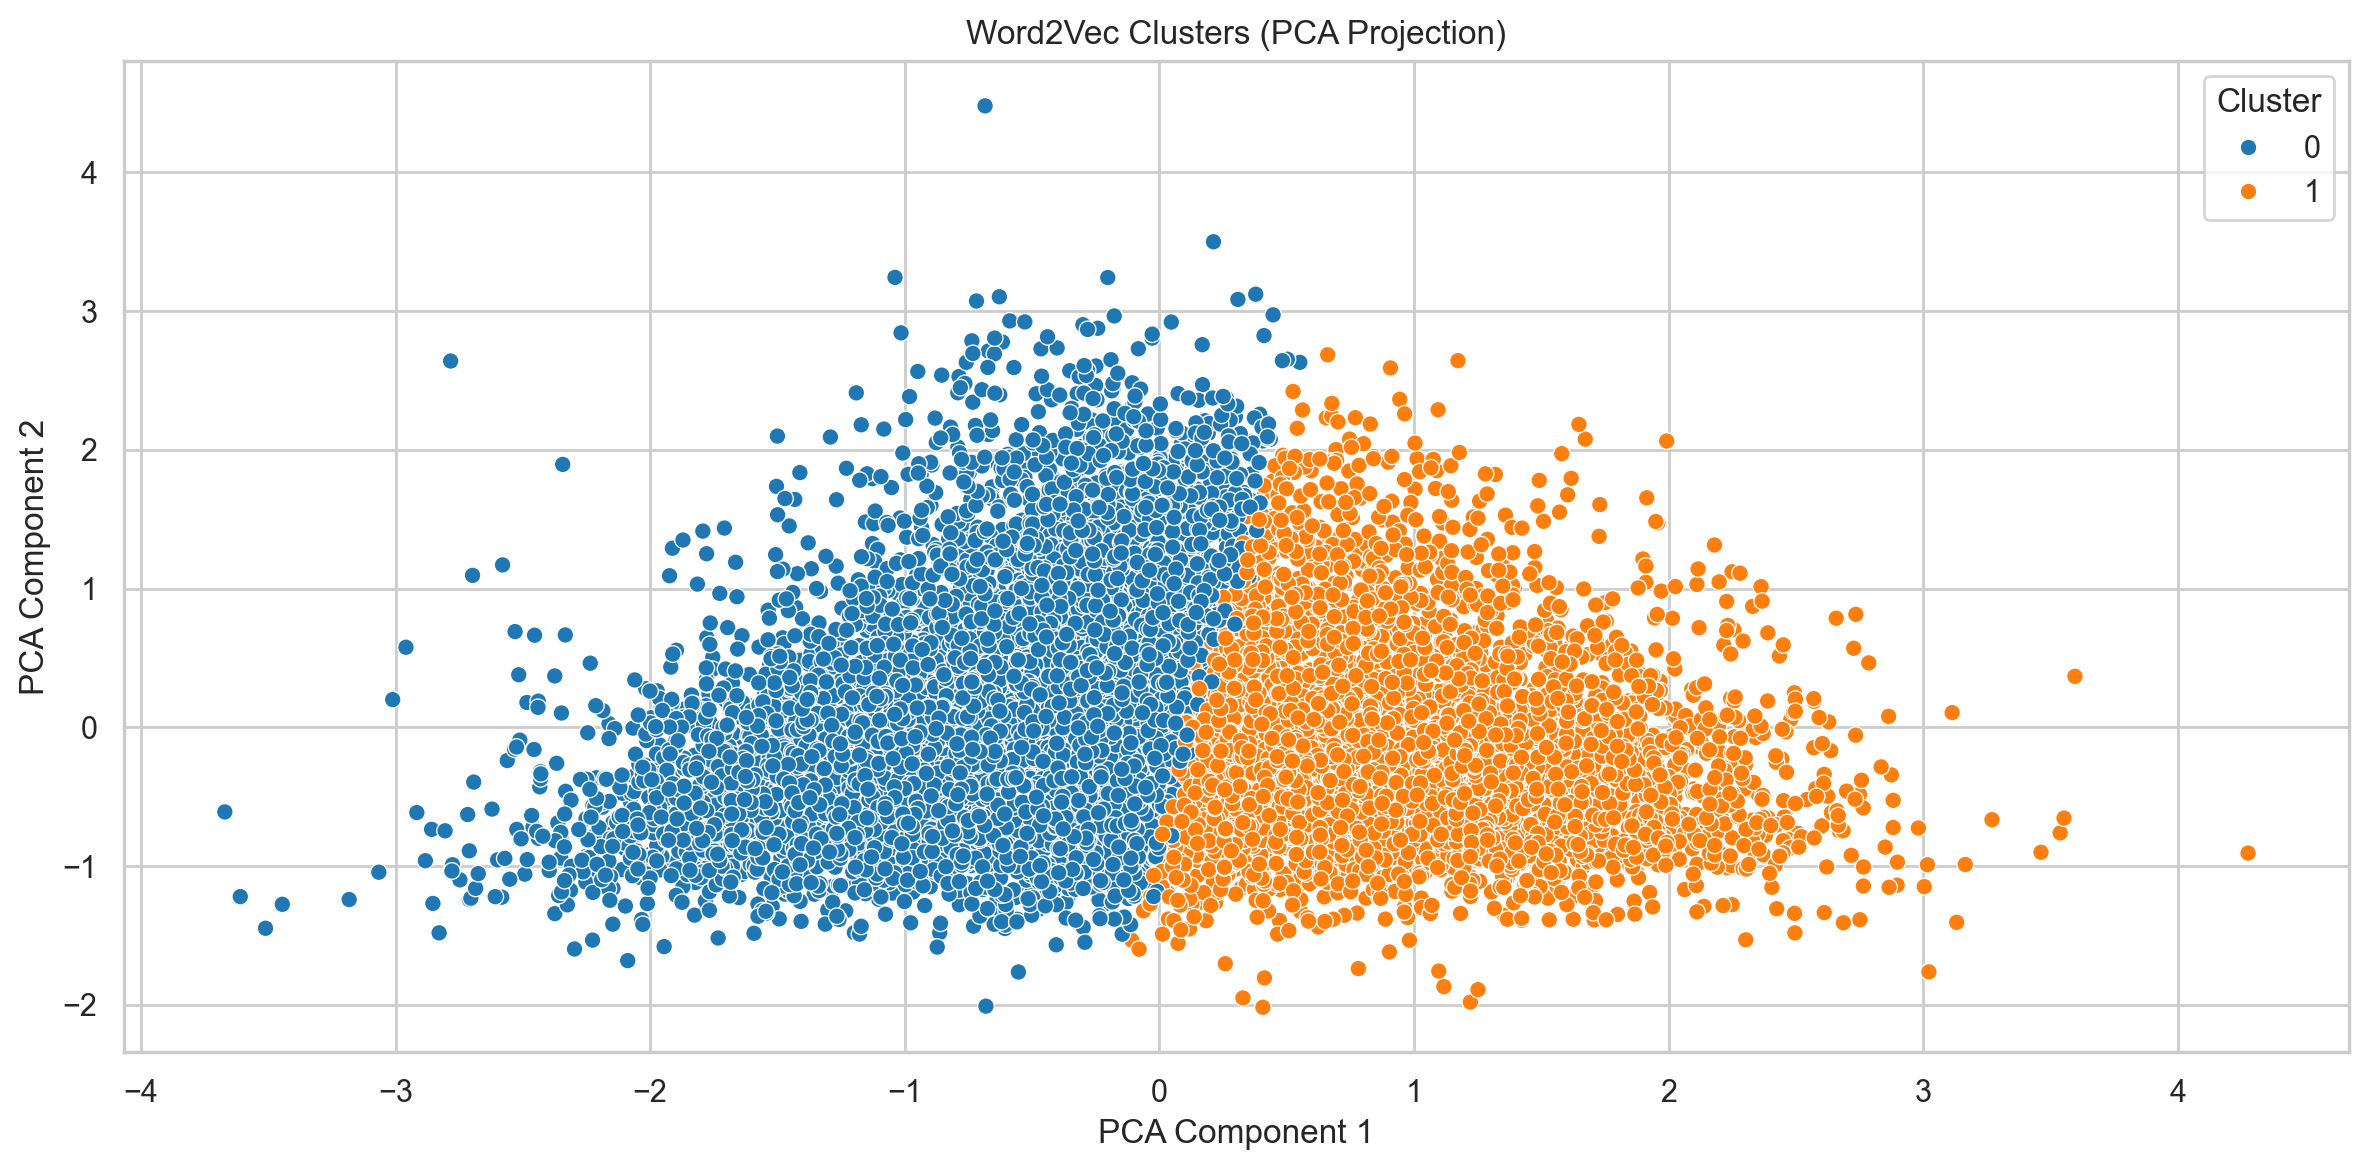

In [142]:
pca = PCA(n_components=2, random_state=42)
X_w2v_2d = pca.fit_transform(X_w2v)

plt.figure()
sns.scatterplot(x=X_w2v_2d[:, 0], y=X_w2v_2d[:, 1], hue=labels_w2v, palette='tab10')
plt.title('Word2Vec Clusters (PCA Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title="Cluster", loc='best')
plt.tight_layout()
plt.show()

To interpret and label the clusters resulting from KMeans clustering on Word2Vec-based document embeddings, we implemented two complementary methods to extract the top representative terms per cluster.
1. Method 1. Most frequent words in sample cluster documents. Intuitive for quick labeling.

2. Method 2. Words closest to the cluster centroid. It can uncover less frequent but more representative terms.


In [143]:
def top_terms_per_cluster(docs, labels, model, top_n_docs=10, top_n_words=10):
    print("\nTop terms per cluster (Word2Vec - frequent words in cluster docs):")
    for cluster_id in sorted(set(labels)):
        cluster_docs = [doc for doc, label in zip(docs, labels) if label == cluster_id]
        sample_docs = cluster_docs[:top_n_docs]

        word_counts = Counter()
        for doc in sample_docs:
            word_counts.update([word for word in doc if word in model.key_to_index])

        top_words = [word for word, _ in word_counts.most_common(top_n_words)]
        print(f"Cluster {cluster_id}: {', '.join(top_words)}")

top_terms_per_cluster(docs_fulltext, labels_w2v, wv)


Top terms per cluster (Word2Vec - frequent words in cluster docs):
Cluster 0: column, sql, table, query, color, value, need, work, search, way
Cluster 1: server, database, version, sql, get, live, file, create, like, good


In [144]:
print("\nTop terms per cluster (Word2Vec - closest to centroid vector):")
for i, center in enumerate(kmeans_w2v.cluster_centers_):
    try:
        similar = wv.similar_by_vector(center, topn=10)
        terms = [word for word, _ in similar]
        print(f"Cluster {i}: {', '.join(terms)}")
    except KeyError:
        print(f"Cluster {i}: No similar words found (possibly OOV center vector)")


Top terms per cluster (Word2Vec - closest to centroid vector):
Cluster 0: overwritten, memoize, boom, typecast, differentiate, supose, nonempty, rebound, indirectly, parsimonious
Cluster 1: unpacked, plist, scott, offend, everytime, subdir, sendmail, consol, magically, cleaning
